## Telecom Churn Case Study

# **Businesss Problem**

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this _dfly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.
 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## **Understanding the Business Objective and the Data**

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

# Steps to follow

    
* [1. Reading & Understanding Data](#1)
    
* [2. Data Cleaning](#2)

* [3. EDA & Visualization](#3)
    
* [4. Train & Test Split](#4)
        
* [5. Model With PCA](#5)  

* [6. Data Preparation](#6)  

* [7. Conclusion](#7)  


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', 500)

## 1. Reading & Understanding Data

In [5]:
tel_data = pd.read_csv('telecom_churn_data.csv')
tel_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [6]:
tel_data.shape

(99999, 226)

In [7]:
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [8]:
tel_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [9]:
# No of missing values in each column 

tel_data.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [10]:
#computes the fraction of missing values in each column by dividing the number of missing values by the total number of rows in the dataset.

tel_data.isnull().sum()/len(tel_data.index)

mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    0.01018
std_og_t2o_mou    0.01018
loc_ic_t2o_mou    0.01018
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64

## 2. Data Cleaning

## **Handling missing values**

In [11]:
tel_miss_cols = (round(((tel_data.isnull().sum()/len(tel_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
tel_miss_cols

null
arpu_3g_6          74.85
night_pck_user_6   74.85
total_rech_data_6  74.85
arpu_2g_6          74.85
max_rech_data_6    74.85
...                  ...
max_rech_amt_7      0.00
max_rech_amt_6      0.00
total_rech_amt_9    0.00
total_rech_amt_8    0.00
sep_vbc_3g          0.00

[226 rows x 1 columns]

**.to_frame('null'):** Converts the resulting pandas Series into a DataFrame with a single column named "null".<br>
**.sort_values('null', ascending=False):** sorts the DataFrame in descending order based on the values in the "null" column

**Let's Delete those columns which are having more than 30% of the missing value in this dataset.**

In [12]:
# First Find out those columns and total in numbers

cols_with_30_percent_missing_value = list(tel_miss_cols.index[tel_miss_cols['null'] > 30])
print(cols_with_30_percent_missing_value,'\n')

len(cols_with_30_percent_missing_value)

['arpu_3g_6', 'night_pck_user_6', 'total_rech_data_6', 'arpu_2g_6', 'max_rech_data_6', 'fb_user_6', 'av_rech_amt_data_6', 'date_of_last_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'date_of_last_rech_data_7', 'total_rech_data_7', 'fb_user_7', 'max_rech_data_7', 'night_pck_user_7', 'count_rech_2g_7', 'av_rech_amt_data_7', 'arpu_2g_7', 'count_rech_3g_7', 'arpu_3g_7', 'total_rech_data_9', 'count_rech_3g_9', 'fb_user_9', 'max_rech_data_9', 'arpu_3g_9', 'date_of_last_rech_data_9', 'night_pck_user_9', 'arpu_2g_9', 'count_rech_2g_9', 'av_rech_amt_data_9', 'total_rech_data_8', 'arpu_3g_8', 'fb_user_8', 'night_pck_user_8', 'av_rech_amt_data_8', 'max_rech_data_8', 'count_rech_3g_8', 'arpu_2g_8', 'count_rech_2g_8', 'date_of_last_rech_data_8'] 



40

**Total 40 columns which are having more than 30% columns which are having Null values.**

In [13]:
# Delete those list of Columns now 

tel_data = tel_data.drop(cols_with_30_percent_missing_value, axis = 1)

In [14]:
tel_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [15]:
tel_data.shape

(99999, 186)

**The total numbers of columns now reduced from 226 to 186 after dropping 40 columns.**

In [16]:
# Deleting the date columns as the date columns are not required in our analysis

date_cols = []
for col in tel_data.columns:
    if 'date' in col:
        date_cols.append(col)
        
print(date_cols, '\n')
print(len(date_cols))

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'] 

8


**Now let's drop these 8 date columns and reduce the no of columsn again**

In [17]:
tel_data = tel_data.drop(date_cols, axis =1)

In [18]:
tel_data.shape

(99999, 178)

In [19]:
tel_data.circle_id.value_counts()

109    99999
Name: circle_id, dtype: int64

**circle_id is having only one ID. Hence there will no impact of this column for our Data analysis.**

In [20]:
tel_data = tel_data.drop('circle_id', axis = 1)

In [21]:
tel_data.shape

(99999, 177)

#### **Filter high-value customers**

In [22]:
# Creating column avg_recharge_amt_6_7 by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.
tel_data['avg_recharge_amt_6_7'] = (tel_data['total_rech_amt_6'] + tel_data['total_rech_amt_7'])/2

In [23]:
print(tel_data.avg_recharge_amt_6_7)

0        307.0
1        229.0
2        241.5
3        270.0
4        273.0
         ...  
99994     85.0
99995    110.0
99996     59.5
99997    369.5
99998    355.0
Name: avg_recharge_amt_6_7, Length: 99999, dtype: float64


In [24]:
#Finding the 70th percentile of the avg_rech_amt_6_7

X = tel_data["avg_recharge_amt_6_7"].quantile(0.7)
X

368.5

**Find now the users who are having more than or equal to 70% recharge amount.** 

In [25]:
tel_data = tel_data[tel_data['avg_recharge_amt_6_7'] >= X]
tel_data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
7      7000701601             0.0             0.0             0.0  1069.180   
8      7001524846             0.0             0.0             0.0   378.721   
13     7002191713             0.0             0.0             0.0   492.846   
16     7000875565             0.0             0.0             0.0   430.975   
17     7000187447             0.0             0.0             0.0   690.008   

      arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1349.850  3171.480  500.000        57.84        54.68        52.29   
8    492.223   137.362  166.787       413.69       351.03        35.08   
13   205.671   593.260  322.732       501.76       108.39       534.24   
16   299.869   187.894  206.490        50.51        74.01        70.61   
17    18.980    25.499  257.583      1185.91         9.28         7.79   

    onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
7           NaN        453.43        567.16        325.91           NaN   
8         33.46         94.66         80.63        136.48        108.71   
13       244.81        413.31        119.28        482.46        214.06   
16        31.34        296.29        229.74        162.76        224.39   
17       558.51         61.64          0.00          5.54         87.89   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
7           16.23          33.49          31.64            NaN          23.74   
8            0.00           0.00           0.00           0.00           0.00   
13          23.53         144.24          72.11         136.78           7.98   
16           0.00           2.83           0.00           0.00           0.00   
17           0.00           4.76           4.81           0.00           0.00   

    roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
7           12.59          38.06            NaN             51.39   
8            0.00           0.00           0.00            297.13   
13          35.26           1.44          12.78             49.63   
16          17.74           0.00           0.00             42.61   
17           8.46          13.34          17.98             38.99   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
7              31.38             40.28               NaN            308.63   
8             217.59             12.49             26.13             80.96   
13              6.19             36.01              6.14            151.13   
16             65.16             67.38             26.88            273.29   
17              0.00              0.00             36.41             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
7             447.38            162.28               NaN             62.13   
8              70.58             50.54             34.58              0.00   
13             47.28            294.46            108.24              4.54   
16            145.99            128.28            201.49              0.00   
17              0.00              0.00              9.38              0.00   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
7              55.14             53.23               NaN               0.0   
8               0.00              0.00              0.00               0.0   
13              0.00             23.51              5.29               0.0   
16              4.48             10.26              4.66               0.0   
17              0.00              0.00              0.00               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
7                0.0              0.00               NaN        422.16   
8                0.0              7.15               0.0        378.09   
13               0.0              0.49               0.0        205.31   
16               0.0        

In [26]:
tel_data.shape

(30011, 178)

As per the condition mentioned in the Data pre-processing, we got nearly equal to ~29.9K rows now.

#### **Handling Missing Value Rows**

In [27]:
tel_data_missing_50 = tel_data[(tel_data.isnull().sum(axis=1)) > (len(tel_data.columns)//2)]
tel_data_missing_50.shape

(114, 178)

In [28]:
tel_data = tel_data.drop(tel_data_missing_50.index)
tel_data.shape

(29897, 178)

In [29]:
tel_missing_cols = (round(((tel_data.isnull().sum()/len(tel_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
tel_missing_cols

null
loc_ic_mou_9          5.32
og_others_9           5.32
loc_og_t2t_mou_9      5.32
loc_ic_t2t_mou_9      5.32
loc_og_t2m_mou_9      5.32
...                    ...
max_rech_amt_7        0.00
max_rech_amt_8        0.00
max_rech_amt_9        0.00
last_day_rch_amt_6    0.00
avg_recharge_amt_6_7  0.00

[178 rows x 1 columns]

**The mou for all the types of calls for September month(9) have some missing values. Let's check that and work on those missing value.**

In [30]:
((tel_missing_cols[tel_missing_cols['null'] == 5.32]).index).to_list()

['loc_ic_mou_9',
 'og_others_9',
 'loc_og_t2t_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'std_ic_t2m_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'roam_og_mou_9',
 'std_ic_t2o_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'spl_og_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_mou_9',
 'onnet_mou_9',
 'spl_ic_mou_9',
 'ic_others_9',
 'isd_ic_mou_9',
 'loc_ic_t2f_mou_9',
 'offnet_mou_9',
 'loc_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'roam_ic_mou_9']

**A new Dataframe with condition for which MOU for sep(9) is null.**

In [31]:
new_tel_data_null_mou_9 = tel_data[(tel_data['loc_og_t2m_mou_9'].isnull()) & (tel_data['loc_ic_t2f_mou_9'].isnull()) & (tel_data['roam_og_mou_9'].isnull()) & (tel_data['std_ic_t2m_mou_9'].isnull()) &
  (tel_data['loc_og_t2t_mou_9'].isnull()) & (tel_data['std_ic_t2t_mou_9'].isnull()) & (tel_data['loc_og_t2f_mou_9'].isnull()) & (tel_data['loc_ic_mou_9'].isnull()) &
  (tel_data['loc_og_t2c_mou_9'].isnull()) & (tel_data['loc_og_mou_9'].isnull()) & (tel_data['std_og_t2t_mou_9'].isnull()) & (tel_data['roam_ic_mou_9'].isnull()) &
  (tel_data['loc_ic_t2m_mou_9'].isnull()) & (tel_data['std_og_t2m_mou_9'].isnull()) & (tel_data['loc_ic_t2t_mou_9'].isnull()) & (tel_data['std_og_t2f_mou_9'].isnull()) & 
  (tel_data['std_og_t2c_mou_9'].isnull()) & (tel_data['og_others_9'].isnull()) & (tel_data['std_og_mou_9'].isnull()) & (tel_data['spl_og_mou_9'].isnull()) & 
  (tel_data['std_ic_t2f_mou_9'].isnull()) & (tel_data['isd_og_mou_9'].isnull()) & (tel_data['std_ic_mou_9'].isnull()) & (tel_data['offnet_mou_9'].isnull()) & 
  (tel_data['isd_ic_mou_9'].isnull()) & (tel_data['ic_others_9'].isnull()) & (tel_data['std_ic_t2o_mou_9'].isnull()) & (tel_data['onnet_mou_9'].isnull()) & 
  (tel_data['spl_ic_mou_9'].isnull())]

new_tel_data_null_mou_9.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
7       7000701601             0.0             0.0             0.0  1069.180   
97      7000589828             0.0             0.0             0.0   374.863   
111     7001300706             0.0             0.0             0.0   596.301   
143     7000106299             0.0             0.0             0.0   695.609   
188     7000340381             0.0             0.0             0.0   734.641   

       arpu_7    arpu_8  arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7    1349.850  3171.480   500.0        57.84        54.68        52.29   
97    294.023   183.043     0.0       433.59       415.66       221.06   
111   146.073     0.000     0.0        55.19         3.26          NaN   
143    39.981     0.000     0.0      1325.91        28.61          NaN   
188   183.668     0.000     0.0         4.38         0.98          NaN   

     onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
7            NaN        453.43        567.16        325.91           NaN   
97           NaN         74.54         43.66         31.86           NaN   
111          NaN         45.51         12.34           NaN           NaN   
143          NaN         13.91          1.89           NaN           NaN   
188          NaN        105.16         39.39           NaN           NaN   

     roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
7            16.23          33.49          31.64            NaN   
97            0.00           0.00           6.16            NaN   
111           0.00           0.00            NaN            NaN   
143           0.00           8.94            NaN            NaN   
188           0.00           0.00            NaN            NaN   

     roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7            23.74          12.59          38.06            NaN   
97            0.00           0.00          23.91            NaN   
111           0.00           0.00            NaN            NaN   
143           0.00           8.53            NaN            NaN   
188           0.00           0.00            NaN            NaN   

     loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7               51.39             31.38             40.28               NaN   
97               2.83             16.19              9.73               NaN   
111             55.19              3.26               NaN               NaN   
143             18.89              6.83               NaN               NaN   
188              4.38              0.98               NaN               NaN   

     loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7              308.63            447.38            162.28               NaN   
97              16.99             23.14             17.79               NaN   
111             43.83             12.34               NaN               NaN   
143              8.58              1.56               NaN               NaN   
188             99.81             38.98               NaN               NaN   

     loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7               62.13             55.14             53.23               NaN   
97               3.54              1.46              1.83               NaN   
111              0.00              0.00               NaN               NaN   
143              0.00              0.00               NaN               NaN   
188              5.34              0.41               NaN               NaN   

     loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.00               0.0               0.0               NaN   
97               0.40               0.0               0.0               NaN   
111              0.00               0.0               NaN               NaN   
143              2.09               0.0               NaN               NaN

In [32]:
new_tel_data_null_mou_9.shape

(1590, 178)

In [33]:
#Now drop these column and whole new data frame

tel_data = tel_data.drop(new_tel_data_null_mou_9.index)

In [34]:
tel_data.shape

(28307, 178)

In [35]:
new_missing_cols = (round(((tel_data.isnull().sum()/len(tel_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
new_missing_cols

null
isd_og_mou_8          0.55
roam_ic_mou_8         0.55
loc_og_mou_8          0.55
std_ic_t2o_mou_8      0.55
roam_og_mou_8         0.55
...                    ...
total_og_mou_9        0.00
total_og_mou_8        0.00
total_og_mou_7        0.00
total_og_mou_6        0.00
avg_recharge_amt_6_7  0.00

[178 rows x 1 columns]

**The mou for all the types of calls for August month(8) have some missing values. Let's check that and work on those missing value.**


In [36]:
((new_missing_cols[new_missing_cols['null'] == 0.55]).index).to_list()

['isd_og_mou_8',
 'roam_ic_mou_8',
 'loc_og_mou_8',
 'std_ic_t2o_mou_8',
 'roam_og_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_og_t2t_mou_8',
 'std_ic_t2f_mou_8',
 'std_og_t2m_mou_8',
 'loc_og_t2m_mou_8',
 'std_og_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'spl_og_mou_8',
 'loc_ic_mou_8',
 'loc_og_t2c_mou_8',
 'std_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'std_og_t2f_mou_8',
 'spl_ic_mou_8',
 'std_ic_mou_8',
 'offnet_mou_8',
 'ic_others_8',
 'og_others_8',
 'loc_ic_t2t_mou_8',
 'onnet_mou_8',
 'isd_ic_mou_8',
 'std_og_t2c_mou_8',
 'std_og_mou_8']

In [37]:
new_tel_data_null_mou_8 = tel_data[(tel_data['loc_og_t2m_mou_8'].isnull()) & (tel_data['loc_ic_t2f_mou_8'].isnull()) & (tel_data['roam_og_mou_8'].isnull()) & (tel_data['std_ic_t2m_mou_8'].isnull()) &
  (tel_data['loc_og_t2t_mou_8'].isnull()) & (tel_data['std_ic_t2t_mou_8'].isnull()) & (tel_data['loc_og_t2f_mou_8'].isnull()) & (tel_data['loc_ic_mou_8'].isnull()) &
  (tel_data['loc_og_t2c_mou_8'].isnull()) & (tel_data['loc_og_mou_8'].isnull()) & (tel_data['std_og_t2t_mou_8'].isnull()) & (tel_data['roam_ic_mou_8'].isnull()) &
  (tel_data['loc_ic_t2m_mou_8'].isnull()) & (tel_data['std_og_t2m_mou_8'].isnull()) & (tel_data['loc_ic_t2t_mou_8'].isnull()) & (tel_data['std_og_t2f_mou_8'].isnull()) & 
  (tel_data['std_og_t2c_mou_8'].isnull()) & (tel_data['og_others_8'].isnull()) & (tel_data['std_og_mou_8'].isnull()) & (tel_data['spl_og_mou_8'].isnull()) & 
  (tel_data['std_ic_t2f_mou_8'].isnull()) & (tel_data['isd_og_mou_8'].isnull()) & (tel_data['std_ic_mou_8'].isnull()) & (tel_data['offnet_mou_8'].isnull()) & 
  (tel_data['isd_ic_mou_8'].isnull()) & (tel_data['ic_others_8'].isnull()) & (tel_data['std_ic_t2o_mou_8'].isnull()) & (tel_data['onnet_mou_8'].isnull()) & 
  (tel_data['spl_ic_mou_8'].isnull())]

new_tel_data_null_mou_8.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
375      7002252754             0.0             0.0             0.0  580.477   
578      7000248548             0.0             0.0             0.0  569.612   
788      7000636808             0.0             0.0             0.0  532.742   
1802     7000516213             0.0             0.0             0.0  810.455   
4837     7002192662             0.0             0.0             0.0  649.150   

       arpu_7  arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
375   111.878     0.0  378.881       249.43        39.64          NaN   
578   237.289     0.0    4.440       718.01       212.73          NaN   
788   546.756     0.0  269.274      1173.39       891.83          NaN   
1802    0.000     0.0    0.000        91.33          NaN          NaN   
4837  149.572     0.0    0.250      1354.24        85.13          NaN   

      onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
375        245.06         62.24         37.24           NaN        144.53   
578          0.00        487.06        139.71           NaN          1.26   
788        149.34         61.59        137.14           NaN        428.36   
1802         0.00       1371.04           NaN           NaN          0.00   
4837         0.43         50.63         37.13           NaN          0.00   

      roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
375           25.49          19.43            NaN           0.00   
578            0.00           2.01            NaN           6.43   
788            0.00           1.48            NaN           0.00   
1802           1.21            NaN            NaN           0.00   
4837           0.00          12.84            NaN           1.25   

      roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
375          312.59          78.58            NaN           0.00   
578            0.00           6.30            NaN           1.26   
788            0.00          14.43            NaN           0.00   
1802          11.23            NaN            NaN           3.91   
4837           0.00          44.78            NaN           0.43   

      loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
375               0.00              0.00               NaN             11.54   
578              11.28             27.89               NaN              0.00   
788              31.06             27.49               NaN              7.39   
1802             17.86               NaN               NaN              0.00   
4837              6.71              1.35               NaN              0.00   

      loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
375               0.00              0.00               NaN             25.31   
578              42.24             46.94               NaN              0.00   
788              34.66             60.86               NaN             34.23   
1802             84.51               NaN               NaN              0.00   
4837             15.18             15.76               NaN              0.00   

      loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
375                0.0               0.0               NaN               0.0   
578                0.0               0.0               NaN               0.0   
788                0.0               0.0               NaN               0.0   
1802               0.0               NaN               NaN               0.0   
4837               0.0               0.0               NaN               0.0   

      loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
375               0.00               0.0               NaN              0.41   
578               2.33               0.0               NaN              0.00   
788               0.00               0.0               NaN              5.58   
1802             10.29               NaN  

In [38]:
# Now let's drop that newly created dataframe.

tel_data = tel_data.drop(new_tel_data_null_mou_8.index)
tel_data.shape

(28150, 178)

In [39]:
new_missing_cols = (round(((tel_data.isnull().sum()/len(tel_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
new_missing_cols

null
roam_ic_mou_6         0.44
spl_og_mou_6          0.44
og_others_6           0.44
loc_ic_t2t_mou_6      0.44
loc_og_t2m_mou_6      0.44
...                    ...
isd_og_mou_9          0.00
isd_og_mou_8          0.00
std_og_mou_9          0.00
std_og_mou_8          0.00
avg_recharge_amt_6_7  0.00

[178 rows x 1 columns]

**The mou for all the types of calls for June month(6) have some missing values. Let's check that and work on those missing value.**

In [40]:
((new_missing_cols[new_missing_cols['null'] == 0.44]).index).to_list()

['roam_ic_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'loc_ic_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2c_mou_6',
 'loc_ic_t2m_mou_6',
 'isd_og_mou_6',
 'loc_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'ic_others_6',
 'roam_og_mou_6',
 'loc_ic_mou_6',
 'std_og_mou_6',
 'loc_og_t2f_mou_6',
 'isd_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_mou_6',
 'std_og_t2t_mou_6',
 'std_ic_t2o_mou_6',
 'std_og_t2f_mou_6',
 'std_ic_t2f_mou_6',
 'spl_ic_mou_6',
 'onnet_mou_6',
 'std_og_t2c_mou_6',
 'std_ic_t2m_mou_6',
 'offnet_mou_6',
 'loc_og_mou_6']

In [41]:
new_tel_data_null_mou_6 = tel_data[(tel_data['loc_og_t2m_mou_6'].isnull()) & (tel_data['loc_ic_t2f_mou_6'].isnull()) & (tel_data['roam_og_mou_6'].isnull()) & (tel_data['std_ic_t2m_mou_6'].isnull()) &
  (tel_data['loc_og_t2t_mou_6'].isnull()) & (tel_data['std_ic_t2t_mou_6'].isnull()) & (tel_data['loc_og_t2f_mou_6'].isnull()) & (tel_data['loc_ic_mou_6'].isnull()) &
  (tel_data['loc_og_t2c_mou_6'].isnull()) & (tel_data['loc_og_mou_6'].isnull()) & (tel_data['std_og_t2t_mou_6'].isnull()) & (tel_data['roam_ic_mou_6'].isnull()) &
  (tel_data['loc_ic_t2m_mou_6'].isnull()) & (tel_data['std_og_t2m_mou_6'].isnull()) & (tel_data['loc_ic_t2t_mou_6'].isnull()) & (tel_data['std_og_t2f_mou_6'].isnull()) & 
  (tel_data['std_og_t2c_mou_6'].isnull()) & (tel_data['og_others_6'].isnull()) & (tel_data['std_og_mou_6'].isnull()) & (tel_data['spl_og_mou_6'].isnull()) & 
  (tel_data['std_ic_t2f_mou_6'].isnull()) & (tel_data['isd_og_mou_6'].isnull()) & (tel_data['std_ic_mou_6'].isnull()) & (tel_data['offnet_mou_6'].isnull()) & 
  (tel_data['isd_ic_mou_6'].isnull()) & (tel_data['ic_others_6'].isnull()) & (tel_data['std_ic_t2o_mou_6'].isnull()) & (tel_data['onnet_mou_6'].isnull()) & 
  (tel_data['spl_ic_mou_6'].isnull())]

new_tel_data_null_mou_6.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
77       7001328263             0.0             0.0             0.0   30.000   
364      7002168045             0.0             0.0             0.0    0.000   
423      7000635248             0.0             0.0             0.0  213.802   
934      7002152278             0.0             0.0             0.0   48.000   
1187     7000486275             0.0             0.0             0.0    0.000   

       arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
77     82.378  674.950  158.710          NaN        34.23       149.69   
364   792.112  989.368  923.040          NaN       433.49       198.96   
423   304.194  149.710  329.643          NaN         0.00         0.00   
934   764.152  500.030  194.400          NaN        14.24        17.48   
1187  757.170  995.719    0.000          NaN      1366.71      2268.91   

      onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
77           6.31           NaN         39.44        179.18         57.68   
364        571.99           NaN        845.11        923.58        828.29   
423          0.00           NaN         10.03          1.45          0.34   
934          7.69           NaN         16.99         76.86         43.64   
1187         0.00           NaN          7.78         36.13          0.00   

      roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
77              NaN            0.0           0.00            0.0   
364             NaN            0.0           0.00            0.0   
423             NaN            0.0           0.00            0.0   
934             NaN            0.0           8.81            0.0   
1187            NaN            0.0           8.08            0.0   

      roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
77              NaN            0.0           0.00           0.00   
364             NaN            0.0           0.00           0.00   
423             NaN            0.0           0.00           0.00   
934             NaN            0.0           1.56           0.00   
1187            NaN            0.0          25.23           0.21   

      loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
77                 NaN             34.23            149.69              6.31   
364                NaN             28.78              7.46             64.73   
423                NaN              0.00              0.00              0.00   
934                NaN              0.08             17.48              7.69   
1187               NaN              4.76             46.18              0.00   

      loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
77                 NaN             32.18            101.63             29.41   
364                NaN             78.78            584.76            490.71   
423                NaN              0.00              0.58              0.33   
934                NaN             16.99             63.23             39.99   
1187               NaN              7.78             31.29              0.00   

      loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
77                 NaN              0.91             29.86             28.26   
364                NaN             21.58              9.43              0.00   
423                NaN              0.00              0.00              0.00   
934                NaN              0.00             12.08              3.65   
1187               NaN              0.00              0.00              0.00   

      loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
77                 NaN               0.0               3.9              0.00   
364                NaN               0.0               0.0              2.78   
423                NaN               0.0               0.0              0.00   
934                NaN              

In [42]:
tel_data = tel_data.drop(new_tel_data_null_mou_6.index)
tel_data.shape

(28026, 178)

In [43]:
new_missing_cols = (round(((tel_data.isnull().sum()/len(tel_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
new_missing_cols

null
loc_ic_t2f_mou_7      0.12
isd_ic_mou_7          0.12
loc_og_t2f_mou_7      0.12
loc_og_t2c_mou_7      0.12
loc_og_mou_7          0.12
...                    ...
spl_og_mou_6          0.00
spl_og_mou_8          0.00
spl_og_mou_9          0.00
og_others_6           0.00
avg_recharge_amt_6_7  0.00

[178 rows x 1 columns]

**The mou for all the types of calls for July month(7) have some missing values. Let's check that and work on those missing value.**

In [44]:
((new_missing_cols[new_missing_cols['null'] == 0.12]).index).to_list()

['loc_ic_t2f_mou_7',
 'isd_ic_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'ic_others_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'loc_og_t2t_mou_7',
 'og_others_7',
 'spl_ic_mou_7',
 'loc_ic_t2t_mou_7',
 'std_ic_mou_7',
 'loc_ic_t2m_mou_7',
 'std_ic_t2o_mou_7',
 'std_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'std_og_t2m_mou_7',
 'std_ic_t2m_mou_7',
 'roam_ic_mou_7',
 'onnet_mou_7',
 'roam_og_mou_7',
 'offnet_mou_7']

In [45]:
new_tel_data_null_mou_7 = tel_data[(tel_data['loc_og_t2m_mou_7'].isnull()) & (tel_data['loc_ic_t2f_mou_7'].isnull()) & (tel_data['roam_og_mou_7'].isnull()) & (tel_data['std_ic_t2m_mou_7'].isnull()) &
  (tel_data['loc_og_t2t_mou_7'].isnull()) & (tel_data['std_ic_t2t_mou_7'].isnull()) & (tel_data['loc_og_t2f_mou_7'].isnull()) & (tel_data['loc_ic_mou_7'].isnull()) &
  (tel_data['loc_og_t2c_mou_7'].isnull()) & (tel_data['loc_og_mou_7'].isnull()) & (tel_data['std_og_t2t_mou_7'].isnull()) & (tel_data['roam_ic_mou_7'].isnull()) &
  (tel_data['loc_ic_t2m_mou_7'].isnull()) & (tel_data['std_og_t2m_mou_7'].isnull()) & (tel_data['loc_ic_t2t_mou_7'].isnull()) & (tel_data['std_og_t2f_mou_7'].isnull()) & 
  (tel_data['std_og_t2c_mou_7'].isnull()) & (tel_data['og_others_7'].isnull()) & (tel_data['std_og_mou_7'].isnull()) & (tel_data['spl_og_mou_7'].isnull()) & 
  (tel_data['std_ic_t2f_mou_7'].isnull()) & (tel_data['isd_og_mou_7'].isnull()) & (tel_data['std_ic_mou_7'].isnull()) & (tel_data['offnet_mou_7'].isnull()) & 
  (tel_data['isd_ic_mou_7'].isnull()) & (tel_data['ic_others_7'].isnull()) & (tel_data['std_ic_t2o_mou_7'].isnull()) & (tel_data['onnet_mou_7'].isnull()) & 
  (tel_data['spl_ic_mou_7'].isnull())]

new_tel_data_null_mou_7.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
5616      7001238202             0.0             0.0             0.0   
9451      7001477649             0.0             0.0             0.0   
9955      7001658068             0.0             0.0             0.0   
10724     7001391499             0.0             0.0             0.0   
12107     7000131738             0.0             0.0             0.0   

         arpu_6   arpu_7   arpu_8    arpu_9  onnet_mou_6  onnet_mou_7  \
5616    760.815  531.088  992.818  1144.676       324.91          NaN   
9451   1129.566    0.000  128.252   802.648        11.89          NaN   
9955    925.028  189.000  789.761   445.707        46.39          NaN   
10724   894.818   85.000  207.040   363.314       117.21          NaN   
12107  1803.475    0.000    0.600    25.243      1742.61          NaN   

       onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
5616        386.13      1180.29        350.29           NaN        399.64   
9451          1.46        33.89        259.18           NaN         26.21   
9955         43.39        56.61        333.78           NaN        196.53   
10724        97.01        35.43        119.79           NaN         12.79   
12107         0.00         0.00        278.79           NaN         14.29   

       offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
5616         887.76         463.63            NaN         221.46   
9451         241.18           9.98            NaN           1.73   
9955         144.73           0.00            NaN           0.00   
10724         92.04           0.00            NaN           0.00   
12107          4.50           0.00            NaN           0.00   

       roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
5616             0.0         505.71            NaN         175.93   
9451             0.0           5.66            NaN           2.46   
9955             0.0           0.00            NaN           0.00   
10724            0.0           0.00            NaN           0.00   
12107            0.0           0.00            NaN           0.00   

       roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
5616             0.0            145.91               NaN            243.43   
9451             0.0              6.73               NaN              1.46   
9955             0.0             46.39               NaN             43.39   
10724            0.0            115.08               NaN             97.01   
12107            0.0             96.08               NaN              0.00   

       loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
5616            1108.38              0.85               NaN            184.78   
9451              20.84            171.46               NaN             20.54   
9955              56.61            227.91               NaN            163.68   
10724             34.98             86.39               NaN              6.59   
12107              0.00             64.98               NaN              0.86   

       loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
5616             300.19              1.13               NaN              7.94   
9451             148.88              0.00               NaN              0.00   
9955             121.54            104.69               NaN             28.96   
10724             55.44             17.18               NaN              6.19   
12107              0.00              0.00               NaN              0.00   

       loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
5616              67.11              0.00               NaN             12.51   
9451               0.00              0.00               NaN              0.00   
9955              21.04              0.00               NaN              0.00   
10724             28.08              0.00               NaN              0.00   


In [46]:
tel_data = tel_data.drop(new_tel_data_null_mou_7.index)
tel_data.shape

(27991, 178)

**Null value checking again**

In [47]:
new_missing_columns = (round(((tel_data.isnull().sum()/len(tel_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
new_missing_columns

null
mobile_number          0.0
total_rech_num_7       0.0
std_ic_mou_7           0.0
std_ic_mou_8           0.0
std_ic_mou_9           0.0
...                    ...
std_og_mou_7           0.0
std_og_mou_8           0.0
std_og_mou_9           0.0
isd_og_mou_6           0.0
avg_recharge_amt_6_7   0.0

[178 rows x 1 columns]

**There is no missing value present now. We handle them properly. We can move on to our analysis now.**

In [48]:
tel_data.shape

(27991, 178)

In [49]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(tel_data.index)/30011)),2)

0.07

**We lost nearly 7% of the rows after all the handling work of missing data.**

In the fourth month, let's identify customers who have **churned (assigned a value of 1)** based on the following criteria: They have neither made any calls (incoming or outgoing) nor used mobile internet during the churn phase. **Customers who do not meet these conditions should be assigned a value of 0** for churn.

In [50]:
tel_data['churn'] = np.where((tel_data['total_ic_mou_9']==0) & (tel_data['total_og_mou_9']==0) & (tel_data['vol_2g_mb_9']==0) & (tel_data['vol_3g_mb_9']==0), 1, 0)

If a customer has not made any incoming or outgoing calls and has not used any 2G or 3G mobile data in **September (which is the churn phase)**, the 'churn' column for that customer will be assigned a value of 1 (indicating that they have churned). Otherwise, the 'churn' column will be assigned a value of 0 (indicating that they have not churned).

In [51]:
tel_data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8      7001524846             0.0             0.0             0.0  378.721   
13     7002191713             0.0             0.0             0.0  492.846   
16     7000875565             0.0             0.0             0.0  430.975   
17     7000187447             0.0             0.0             0.0  690.008   
21     7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
8   492.223  137.362  166.787       413.69       351.03        35.08   
13  205.671  593.260  322.732       501.76       108.39       534.24   
16  299.869  187.894  206.490        50.51        74.01        70.61   
17   18.980   25.499  257.583      1185.91         9.28         7.79   
21  597.753  637.760  578.596       102.41       132.11        85.14   

    onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
8         33.46         94.66         80.63        136.48        108.71   
13       244.81        413.31        119.28        482.46        214.06   
16        31.34        296.29        229.74        162.76        224.39   
17       558.51         61.64          0.00          5.54         87.89   
21       161.63        757.93        896.68        983.39        869.89   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
8            0.00           0.00           0.00           0.00           0.00   
13          23.53         144.24          72.11         136.78           7.98   
16           0.00           2.83           0.00           0.00           0.00   
17           0.00           4.76           4.81           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   

    roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13          35.26           1.44          12.78             49.63   
16          17.74           0.00           0.00             42.61   
17           8.46          13.34          17.98             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
8             217.59             12.49             26.13             80.96   
13              6.19             36.01              6.14            151.13   
16             65.16             67.38             26.88            273.29   
17              0.00              0.00             36.41             58.54   
21              6.16             23.34             29.98             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
8              70.58             50.54             34.58              0.00   
13             47.28            294.46            108.24              4.54   
16            145.99            128.28            201.49              0.00   
17              0.00              0.00              9.38              0.00   
21             87.93            104.81            107.54              0.75   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
8               0.00              0.00              0.00               0.0   
13              0.00             23.51              5.29               0.0   
16              4.48             10.26              4.66               0.0   
17              0.00              0.00              0.00               0.0   
21              0.00              1.58              0.00               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
8                0.0              7.15               0.0        378.09   
13               0.0              0.49               0.0        205.31   
16               0.0              0.00               0.0        315.91   
17               0.0              0.00        

In [52]:
# Dropping those variable which are in corresponding churn phase.
column_sep_9 = []
for col in tel_data.columns.to_list():
    if '_9' in col:
        column_sep_9.append(col)
print(column_sep_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [53]:
#Delete the churn month columns now

tel_data = tel_data.drop(column_sep_9, axis =1)
tel_data.shape

(27991, 137)

In [54]:
# Dropping sep_vbc_3g column which didn't come under _9 column names.
tel_data = tel_data.drop('sep_vbc_3g', axis=1)

In [55]:
#Checking Churn percentage now

round(100*(tel_data['churn'].mean()),2)

3.39

### **Outliers treatment**

In the filtered dataset except mobile_number and churn columns all the columns are numeric types. Hence, converting mobile_number and churn datatype to object.


In [56]:
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Columns: 136 entries, mobile_number to churn
dtypes: float64(109), int64(27)
memory usage: 29.3 MB


In [57]:
#Converting Mobile number and churn data type to object type.
tel_data['mobile_number'] = tel_data['mobile_number'].astype(object)
tel_data['churn'] = tel_data['churn'].astype(object)

In [58]:
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Columns: 136 entries, mobile_number to churn
dtypes: float64(109), int64(25), object(2)
memory usage: 29.3+ MB


In [59]:
num_cols = tel_data.select_dtypes(exclude=['object']).columns
print(num_cols,'\n')
print(len(num_cols))

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_recharge_amt_6_7'],
      dtype='object', length=134) 

134


In [60]:
# Removing outliers below 10th and above 90th percentile
for col in num_cols: 
    q1 = tel_data[col].quantile(0.10)
    q3 = tel_data[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    new_data = tel_data.loc[(tel_data[col] > range_low) & (tel_data[col] < range_high)]

new_data.shape

(27705, 136)

The rows now reduced from 27991 to 27705

**Finding New Features**

In [61]:
list(filter(lambda x: 'total' in x, new_data.columns.to_list()))

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

**Deriving new column decrease_mou_action**

In [62]:
#Good phase incoming + outgoing calls
new_data['total_mou_good'] = (new_data['total_og_mou_6'] + new_data['total_ic_mou_6'])

In [63]:
# Now finding out Avg. mou at action Phase because there are two months 
#7 and 8 months are the ones we are considering 

new_data['avg_mou_action'] = (new_data['total_og_mou_7'] + new_data['total_og_mou_8'] + new_data['total_ic_mou_7'] + new_data['total_ic_mou_8'])/2

In [64]:
# Difference avg_mou_good and avg_mou_action
new_data['diff_mou'] = new_data['avg_mou_action'] - new_data['total_mou_good']

In [65]:
# Checking whether the mou has decreased in action phase
new_data['decrease_mou_action'] = np.where((new_data['diff_mou'] < 0), 1, 0)

In [66]:
new_data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
8   492.223  137.362       413.69       351.03        35.08         94.66   
13  205.671  593.260       501.76       108.39       534.24        413.31   
16  299.869  187.894        50.51        74.01        70.61        296.29   
17   18.980   25.499      1185.91         9.28         7.79         61.64   
21  597.753  637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   
21         94.09        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0

**Deriving new column decrease_rech_num_action**

In [67]:
# Avg rech number at action phase

new_data['avg_rech_num_action'] = (new_data['total_rech_num_7'] + new_data['total_rech_num_8'])/2

In [68]:
# Difference total_rech_num_6 and avg_rech_action
new_data['diff_rech_num'] = new_data['avg_rech_num_action'] - new_data['total_rech_num_6']

In [69]:
# Checking if rech_num has decreased in action phase
new_data['decrease_rech_num_action'] = np.where((new_data['diff_rech_num'] < 0), 1, 0)

In [70]:
new_data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
8   492.223  137.362       413.69       351.03        35.08         94.66   
13  205.671  593.260       501.76       108.39       534.24        413.31   
16  299.869  187.894        50.51        74.01        70.61        296.29   
17   18.980   25.499      1185.91         9.28         7.79         61.64   
21  597.753  637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   
21         94.09        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0

**Deriving new column decrease_rech_amt_action**

In [71]:
#This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

# Avg rech_amt in action phase

new_data['avg_rech_amt_action'] = (new_data['total_rech_amt_7'] + new_data['total_rech_amt_8'])/2

In [72]:
# Difference of action phase rech amt and good phase rech amt

new_data['diff_rech_amt'] = new_data['avg_rech_amt_action'] - new_data['total_rech_amt_6']

In [73]:
# Checking if rech_amt has decreased in action phase

new_data['decrease_rech_amt_action'] = np.where((new_data['diff_rech_amt'] < 0), 1, 0) 

In [74]:
new_data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
8   492.223  137.362       413.69       351.03        35.08         94.66   
13  205.671  593.260       501.76       108.39       534.24        413.31   
16  299.869  187.894        50.51        74.01        70.61        296.29   
17   18.980   25.499      1185.91         9.28         7.79         61.64   
21  597.753  637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   
21         94.09        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0

**Deriving new column decrease_arpu_action**

In [75]:
# ARUP(Average revenue per user) in action phase

new_data['avg_arpu_action'] = (new_data['arpu_7'] + new_data['arpu_8'])/2

In [76]:
# Difference of good and action phase ARPU

new_data['diff_arpu'] = new_data['avg_arpu_action'] - new_data['arpu_6']

In [77]:
# Checking whether the arpu has decreased on the action month

new_data['decrease_arpu_action'] = np.where(new_data['diff_arpu'] < 0, 1, 0)

In [78]:
new_data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
8   492.223  137.362       413.69       351.03        35.08         94.66   
13  205.671  593.260       501.76       108.39       534.24        413.31   
16  299.869  187.894        50.51        74.01        70.61        296.29   
17   18.980   25.499      1185.91         9.28         7.79         61.64   
21  597.753  637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   
21         94.09        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0

**Deriving new column decrease_vbc_action**

In [79]:
# VBC(Volume based cost - when no specific scheme is not purchased and paid as per usage)in action phase

new_data['avg_vbc_3g_action'] = (new_data['jul_vbc_3g'] + new_data['aug_vbc_3g'])/2

In [80]:
# Difference of good and action phase VBC

new_data['diff_vbc'] = new_data['avg_vbc_3g_action'] - new_data['jun_vbc_3g']

In [81]:
# Checking whether the VBC has decreased on the action month

new_data['decrease_vbc_action'] = np.where(new_data['diff_vbc'] < 0 , 1, 0)

In [82]:
new_data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
8   492.223  137.362       413.69       351.03        35.08         94.66   
13  205.671  593.260       501.76       108.39       534.24        413.31   
16  299.869  187.894        50.51        74.01        70.61        296.29   
17   18.980   25.499      1185.91         9.28         7.79         61.64   
21  597.753  637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   
21         94.09        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0

## 3. EDA & Visualization Analysis

## **Univariate Analysis:**

In [83]:
tel_data.churn.value_counts()

0    27042
1      949
Name: churn, dtype: int64

In [84]:
tel_data.churn.dtypes

dtype('O')

In [85]:
# Let's change the data type of the churn variable to int

new_data['churn'] = new_data['churn'].astype('int64')

<Figure size 1000x600 with 0 Axes>

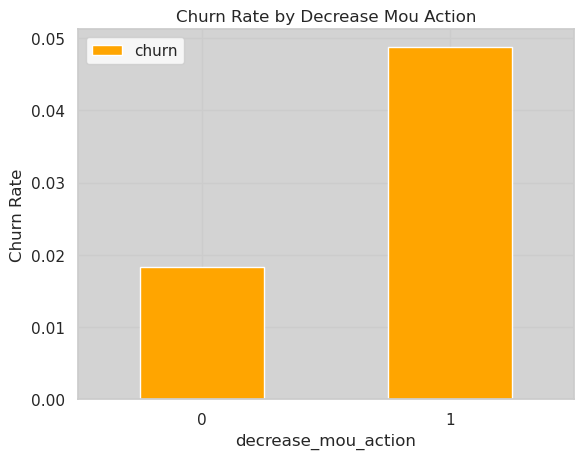

In [86]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
ax = new_data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar(color='orange')
ax.set_ylabel('Churn Rate')
ax.set_title('Churn Rate by Decrease Mou Action')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_facecolor('lightgray')
plt.show()

<Figure size 1000x600 with 0 Axes>

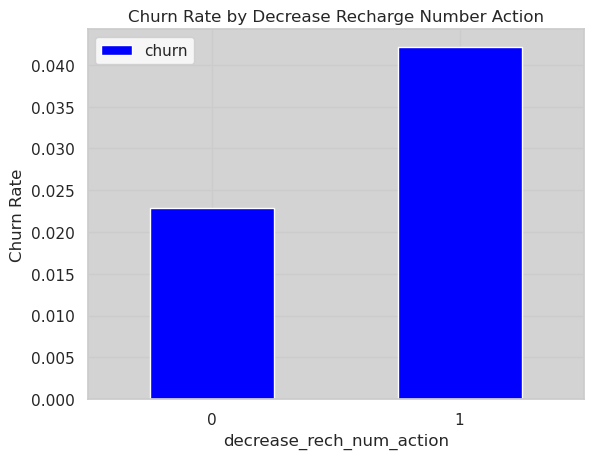

In [87]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
ax = new_data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar(color='blue')
ax.set_ylabel('Churn Rate')
ax.set_title('Churn Rate by Decrease Recharge Number Action')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_facecolor('lightgray')
plt.show()

<Figure size 1000x600 with 0 Axes>

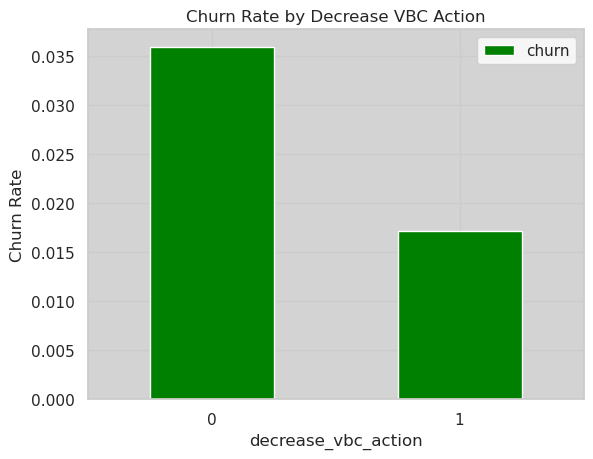

In [88]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
ax = new_data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar(color='green')
ax.set_ylabel('Churn Rate')
ax.set_title('Churn Rate by Decrease VBC Action')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_facecolor('lightgray')
plt.show()

**Analysis of the average revenue per customer (Churn and Not Churn) in the action phase**

In [89]:
# Creating Churn dataframe

churn_df = new_data[new_data['churn'] == 1]

# Creating not churn dataframe

non_churn_df = new_data[new_data['churn'] == 0]

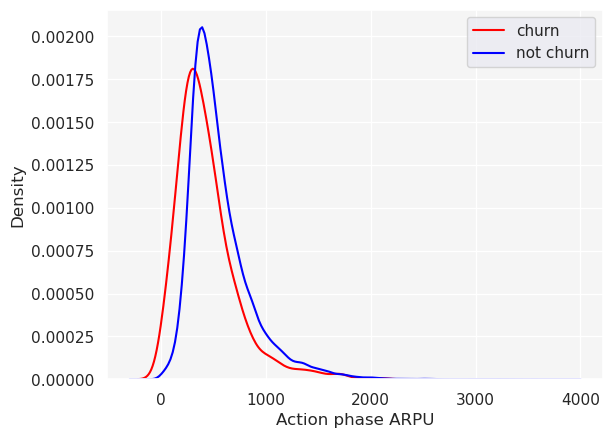

In [90]:
# Set the background color
sns.set_style("darkgrid")
ax = plt.gca()
ax.set_facecolor('#F5F5F5')

ax = sns.distplot(churn_df['avg_arpu_action'], label='churn', hist=False, color='red')
ax = sns.distplot(non_churn_df['avg_arpu_action'], label='not churn', hist=False, color='blue')
ax.set(xlabel='Action phase ARPU')

# Add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()


* The higher the ARPU(Avg Revenue Per User) the less likely to be churned.
* ARPU with less churned are in between 0 to 900.
* Maximum number of unchurned customers are when their ARPU is nearly 500.

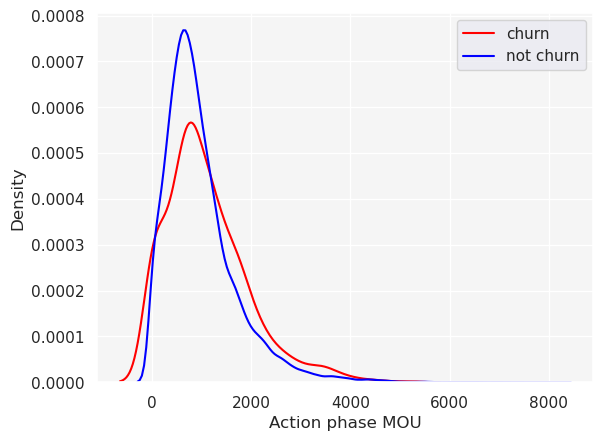

In [91]:
# Set the background color
sns.set_style("darkgrid")
ax = plt.gca()
ax.set_facecolor('#F5F5F5')

ax = sns.distplot(churn_df['total_mou_good'], label='churn', hist=False, color='red')
ax = sns.distplot(non_churn_df['total_mou_good'], label='not churn', hist=False, color='blue')
ax.set(xlabel='Action phase MOU')

# Add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()


* MOU(Minutes Of Usage) of the churn customer is in between 0 to 2000.
* Higher the MOU lesser the Churn. 

## **Bivariate Analysis:**

**Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase**

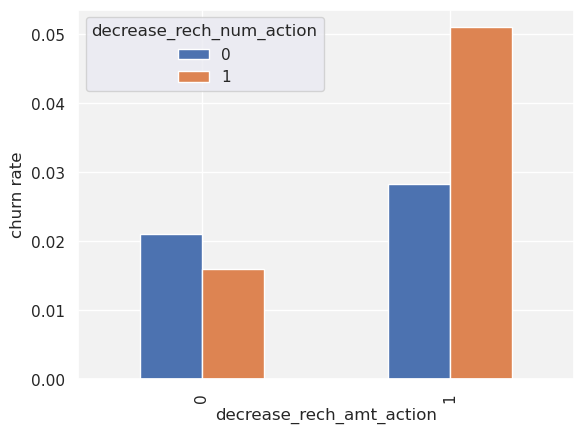

In [92]:
ax = new_data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
ax.set_facecolor('#f2f2f2')
plt.ylabel('churn rate')
plt.show()


The plot indicates that customers who have experienced a decrease in both the amount and number of recharge during the action phase have a higher churn rate compared to those who did not experience a decrease during this phase.

**Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase**

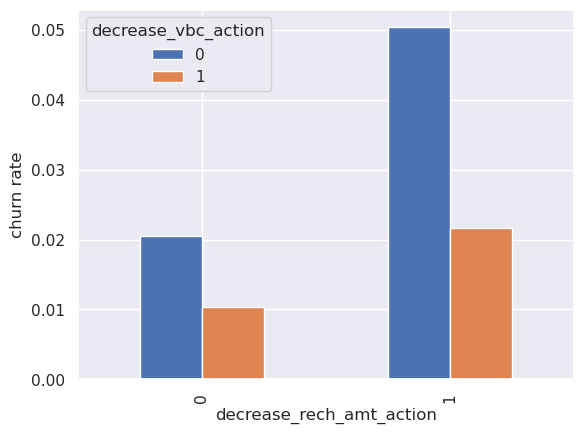

In [93]:
new_data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

The analysis shows that customers who experienced a decrease in recharge amount along with an increase in volume-based cost during the action month have a higher churn rate.

**Analysis of recharge amount and number of recharge in action month**

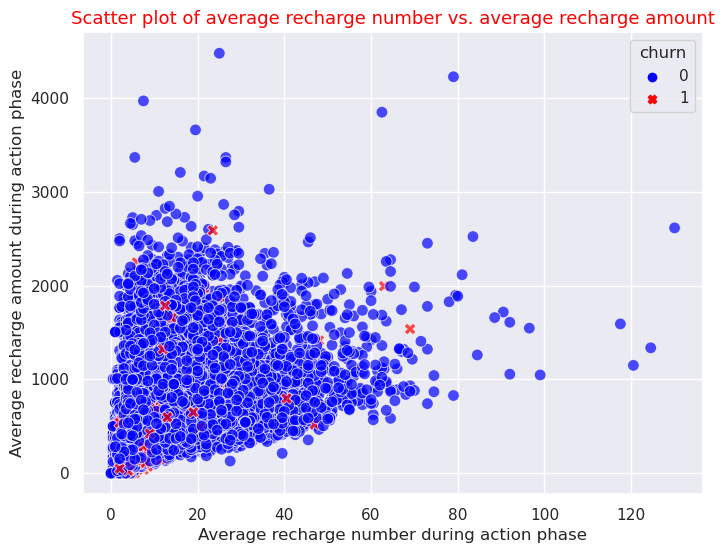

In [94]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x='avg_rech_num_action', y='avg_rech_amt_action', hue='churn', style='churn', data=new_data, palette=['blue', 'red'], s=70, alpha=0.7)
ax.set_title('Scatter plot of average recharge number vs. average recharge amount', fontsize = 13, color = 'red')
ax.set_xlabel('Average recharge number during action phase')
ax.set_ylabel('Average recharge amount during action phase')
# plt.legend(title='Churn', labels=['Non-churner', 'Churner'])
plt.show()

The pattern observed in the above analysis suggests that there is a positive correlation between recharge number and recharge amount. In other words, as the number of recharges increases, so does the total amount of recharge.

**Let's Drop the the derived columns now**

In [95]:
new_data = new_data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc'], axis=1)

## 4. Train & Test Split

In [96]:
from sklearn.model_selection import train_test_split

* **X = Feature Variable**
* **y = Target Variable**

In [97]:
X = new_data.drop(['mobile_number','churn'], axis=1)

In [98]:
y = new_data['churn']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## **Dealing with data imbalance**


To address the issue of class imbalance, we are generating synthetic samples through upsampling using SMOTE (Synthetic Minority Oversampling Technique).

In [100]:
from imblearn.over_sampling import SMOTE

In [101]:
sm = SMOTE(random_state=27)

In [102]:
X_train, y_train = sm.fit_resample(X_train, y_train)

## **Feature Scaling**

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()

In [105]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
print(cols_scale)
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'to

In [106]:
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [107]:
X_train.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0  0.138099 -0.524287   
1             0.0             0.0             0.0 -1.426806  4.416224   
2             0.0             0.0             0.0 -0.224707  0.539487   
3             0.0             0.0             0.0 -0.911761  0.837930   
4             0.0             0.0             0.0  0.268418  0.244582   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0 -0.277210     0.107067    -0.662133    -0.465702     -0.212150   
1  3.251471    -0.658546    -0.237116    -0.004389     -0.775413   
2  0.807618    -0.601250    -0.599325    -0.330972     -0.363909   
3  0.729845    -0.702321    -0.650532    -0.458389     -0.789083   
4  1.254684    -0.356217    -0.180984     0.114784      0.895093   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0     -0.635989      0.316602      -0.254930      -0.001299      -0.235845   
1      2.521574      2.729991      -0.254930      -0.253598      -0.304936   
2     -0.495675     -0.028637      -0.254930      -0.253598      -0.304936   
3     -0.654040     -0.519135      -0.254930      -0.253598      -0.304936   
4      0.903508      1.254586      -0.231839      -0.253598      -0.304936   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0      -0.299924      -0.376405      -0.414431         -0.263290   
1      -0.299924      -0.376405      -0.432652         -0.201389   
2      -0.299924      -0.376405      -0.432652          0.077652   
3      -0.299924      -0.376405      -0.432652         -0.192283   
4      -0.202470      -0.376405      -0.432652          0.128333   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0         -0.311912         -0.251552          0.484696         -0.191237   
1          0.270420          0.198129         -0.529895          1.105781   
2         -0.096283          0.228212          0.604211          0.257691   
3         -0.181879         -0.065096         -0.372309         -0.205673   
4          0.784307          1.061971          1.421324          0.995231   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0         -0.399363         -0.257169         -0.268141         -0.245271   
1          0.288744         -0.276559         -0.268141         -0.245271   
2          0.908040          1.469207          0.447468         -0.132188   
3         -0.251710         -0.157714          0.213413         -0.245271   
4          1.845307          0.776780          1.048189          0.518205   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0         -0.192015         -0.268757         -0.245087      0.128525   
1         -0.192015         -0.268757         -0.245087     -0.477412   
2         -0.192015         -0.268757         -0.245087      0.511762   
3          0.987026          2.430108          2.555944     -0.365247   
4          1.786205         -0.268757          0.842190      1.024284   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0     -0.336170     -0.418989          0.255586         -0.528520   
1      0.843110      0.290263         -0.570492         -0.320415   
2      0.120357      0.710151         -0.618642         -0.551728   
3     -0.233798     -0.212875         -0.619861         -0.570355   
4      1.182688      1.843173         -0.413978         -0.474858   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0         -0.337598         -0.342567         -0.503801          0.649999   
1         -0.040870         -0.512457          2.293280          3.084824   
2         -0.419779         -0.616861         -0.570879         -0.416586   
3         -0.419779         -0.621519         -0.578159         -0.406108   
4         -0.326579          0.356169          0.584964          0.555397   

   std_og_t2f_mou_6  std_og_t2f_mo

In [108]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
5704              0.0             0.0             0.0  0.241426 -0.270857   
64892             0.0             0.0             0.0  0.045864 -0.780568   
39613             0.0             0.0             0.0  0.541988  0.181418   
93118             0.0             0.0             0.0  0.637835  0.812342   
81235             0.0             0.0             0.0  3.868522  0.907132   

         arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
5704   1.004286    -0.725392    -0.690239    -0.476559      0.480613   
64892 -0.158953    -0.734179    -0.698080    -0.502143     -0.359083   
39613  1.401534    -0.537073    -0.521821    -0.206823      0.691372   
93118 -0.211980    -0.058442     0.029072    -0.155806     -0.149324   
81235  2.742767     4.121406     1.450022     2.809553     -0.004176   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
5704       0.306880      2.321843      -0.077770      -0.253598   
64892     -0.577343     -0.256317       0.022647      -0.253598   
39613      0.434507      1.463713      -0.254930      -0.253598   
93118     -0.143467     -0.410983      -0.254930      -0.253598   
81235     -0.290206      0.028895      -0.254930      -0.253598   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
5704       -0.304936       0.213029      -0.376405      -0.432652   
64892      -0.304936      -0.120567      -0.376405      -0.432652   
39613      -0.304936      -0.299924      -0.376405      -0.432652   
93118      -0.304936      -0.299924      -0.376405      -0.432652   
81235      -0.005607      -0.299924      -0.376405       1.455129   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
5704          -0.278196         -0.282988         -0.106923          0.027413   
64892         -0.278359         -0.302953         -0.174725         -0.300718   
39613          0.254194          0.145865          0.514000          2.792693   
93118          0.871577          1.002393          0.222369          0.870121   
81235          2.887581          0.288850          1.361933          0.765920   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
5704           0.005712          0.033944         -0.088284         -0.268141   
64892         -0.204587         -0.296065         -0.262173         -0.268141   
39613          2.185662          3.743375          0.010545         -0.078086   
93118          0.712589         -0.116257          1.663111          1.303021   
81235          0.539248          0.742764          0.004290         -0.268141   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
5704          -0.245271          0.034550         -0.268757         -0.245087   
64892         -0.245271         -0.192015         -0.268757         -0.245087   
39613          1.171866         -0.192015         -0.268757         -0.245087   
93118          0.641093         -0.192015         -0.268757         -0.245087   
81235         -0.245271         -0.192015         -0.268757         -0.245087   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
5704      -0.161739     -0.195986     -0.055352         -0.610719   
64892     -0.379480     -0.338577     -0.306903         -0.619861   
39613      1.931559      1.437447      2.762733         -0.619861   
93118      1.188524      1.164902      0.092918         -0.357820   
81235      2.295739      0.506173      1.277684          3.239386   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
5704          -0.570355         -0.419779          0.345721          0.369717   
64892         -0.570355         -0.415489         -0.232172         -0.436745   
39613         -0.570355         -0.419779         -0.395097         -0.342732   
93118         -0.342984         -0.221520         -0.507935         -0.406333   
81235       

## 5. Model With PCA

In [109]:
from sklearn.decomposition import PCA

In [110]:
pca = PCA(random_state=42)

In [111]:
pca.fit(X_train)

PCA(random_state=42)

In [112]:
pca.components_

array([[-8.63049762e-20,  2.77555756e-17,  2.22044605e-16, ...,
        -2.56279206e-02, -2.53679353e-02,  1.34506111e-02],
       [-1.57765916e-19, -1.38777878e-16,  0.00000000e+00, ...,
        -7.64831648e-03, -6.18264338e-03, -1.39840231e-02],
       [ 1.91262334e-19,  0.00000000e+00, -1.94289029e-16, ...,
        -3.37159849e-02, -3.45638734e-02,  2.53953362e-02],
       ...,
       [ 0.00000000e+00, -8.31354912e-03,  6.54792689e-03, ...,
        -4.03323208e-17,  1.01589744e-16,  3.72965547e-17],
       [ 9.99998649e-01, -5.86658582e-04,  1.52901091e-03, ...,
         2.30392962e-19,  2.57498016e-19, -1.77402580e-17],
       [-0.00000000e+00,  4.98394491e-02,  1.13900466e-02, ...,
        -9.86623977e-17,  1.21864324e-16,  5.20417043e-17]])

In [113]:
# Cumuliative varinace of the PCs
cum_var = np.cumsum(pca.explained_variance_ratio_)
print(cum_var)

[0.11232817 0.19679257 0.24854161 0.29205551 0.33117638 0.36897766
 0.40483244 0.4344983  0.45994189 0.48468016 0.50736205 0.52914774
 0.54951506 0.56912274 0.58725587 0.60489463 0.6207253  0.63647277
 0.65090489 0.66494767 0.67857083 0.69159912 0.7033726  0.71401396
 0.72428648 0.73419966 0.74384076 0.75335548 0.76271425 0.7712447
 0.77970272 0.78768878 0.79533227 0.80272318 0.80971991 0.81628489
 0.822782   0.82914688 0.8354722  0.84159082 0.84752563 0.85341006
 0.85897349 0.86428097 0.86952472 0.87465024 0.87937499 0.88385782
 0.88812752 0.89223995 0.89623413 0.90002004 0.9037606  0.90738322
 0.91092092 0.91441539 0.91779678 0.92108999 0.92431452 0.92739539
 0.93035936 0.93329892 0.93614167 0.93894597 0.94171025 0.94442634
 0.94708516 0.94968195 0.95217306 0.95460877 0.95689619 0.95917039
 0.96137855 0.96342221 0.96543918 0.9673604  0.96927233 0.97113478
 0.97297417 0.97476991 0.97648282 0.97814394 0.97978956 0.9813876
 0.98294315 0.98448207 0.98601334 0.98752304 0.98875509 0.989955

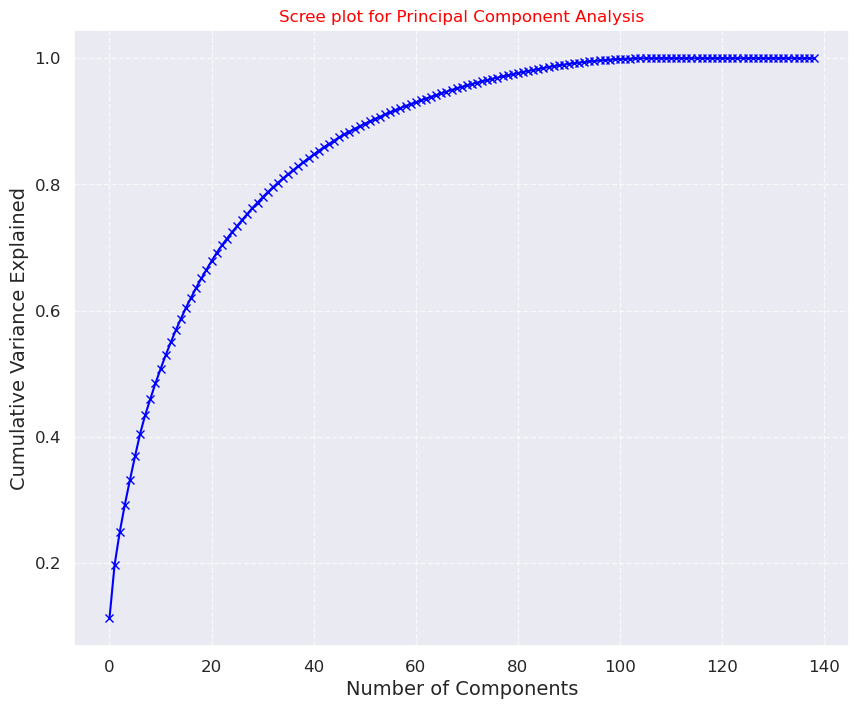

In [114]:
fig = plt.figure(figsize=(10, 8))
plt.plot(cum_var, color='blue', marker='x')
plt.title('Scree plot for Principal Component Analysis', fontsize=12, color ='red')
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Variance Explained', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

The scree plot shows that approximately 90% of the variance in the data is explained by 60 principal components. Therefore, we will proceed with performing PCA using 60 components.

**Performing PCA with 60 components**

In [115]:
from sklearn.decomposition import IncrementalPCA

In [116]:
final_pca = IncrementalPCA(n_components = 60)

In [117]:
X_train_pca = final_pca.fit_transform(X_train)

In [118]:
#Applying transformation on the test set

X_test_pca = final_pca.transform(X_test)

In this scenario, achieving a higher **Sensitivity/Recall** score is more crucial than Accuracy. 

* The primary objective is to retain customers who are at risk of churning, and it is more important to correctly identify those customers, even if it means misclassifying some non-churning customers as potentially churning. Offering incentives to a few non-churning customers is an acceptable trade-off if it means retaining those who are likely to churn. Therefore, Sensitivity score holds greater significance in this case.

## **Logistic regression with PCA**

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

**Tuning hyperparameter C**

In [120]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [121]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [122]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.450207      0.018118         0.008248        0.000079    0.01   
1       0.719842      0.028587         0.008472        0.000369     0.1   
2       0.829027      0.100304         0.010440        0.003346       1   
3       0.792066      0.161286         0.008260        0.000155      10   
4       0.715642      0.030024         0.008144        0.000059     100   
5       0.713755      0.008926         0.008182        0.000047    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.900545           0.898226           0.897442   
1   {'C': 0.1}           0.900308           0.897759           0.896279   
2     {'C': 1}           0.900781           0.898459           0.899070   
3    {'C': 10}           0.899597           0.898459           0.899767   
4   {'C': 100}           0.899834           0.898459           0.900000   
5  {'C': 1000}           0.899834           0.898459           0.900000   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.905726           0.887089         0.897806        0.006089   
1           0.907123           0.889403         0.898174        0.005750   
2           0.905959           0.890560         0.898966        0.004962   
3           0.906192           0.890560         0.898915        0.004983   
4           0.905959           0.890791         0.899009        0.004854   
5           0.905726           0.890329         0.898870        0.004947   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.901232            0.898314   
1                5            0.902221            0.899539   
2                2            0.903907            0.900239   
3                3            0.903732            0.900356   
4                1            0.903790            0.900589   
5                4            0.903732            0.900589   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.899620            0.896024            0.898731   
1            0.899679            0.898184            0.899550   
2            0.900438            0.899060            0.901070   
3            0.899854            0.899002            0.901304   
4            0.899854            0.899060            0.901362   
5            0.899854            0.899002            0.901128   

   mean_train_score  std_train_score  
0          0.898784         0.001705  
1          0.899835         0.001312  
2          0.900943         0.001618  
3          0.900850         0.001623  
4          0.900931         0.001621  
5          0.900861         0.001604

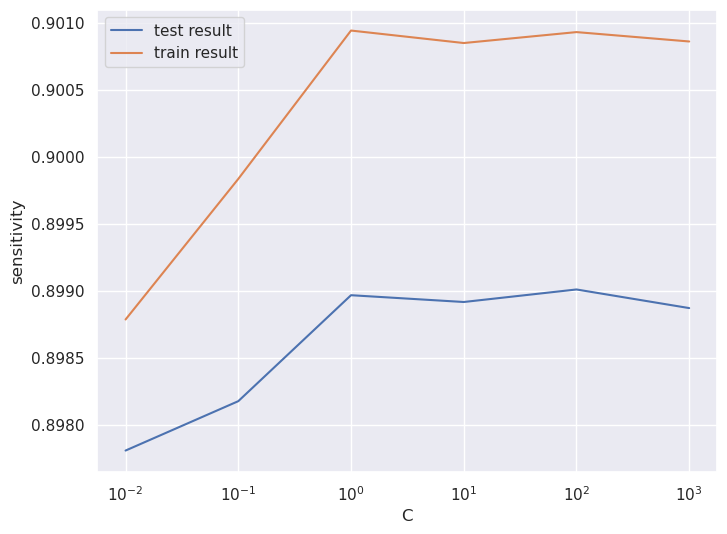

In [123]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(cv_results['param_C'], cv_results['mean_test_score'], label='test result')
ax.plot(cv_results['param_C'], cv_results['mean_train_score'], label='train result')
ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('sensitivity')
ax.legend(loc='upper left')

plt.show()

In [124]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8990087913591276 at C = 100


**Logistic regression with optimal C**

In [125]:
pca_logistic = LogisticRegression(C=best_C)

In [126]:
log_pca_model = pca_logistic.fit(X_train_pca, y_train)

In [127]:
# Predictions on the train set

y_train_pred = log_pca_model.predict(X_train_pca)

In [128]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17910  3515]
 [ 2127 19298]]


In [129]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.8683313885647608
Sensitivity: 0.9007234539089848
Specificity: 0.8359393232205368


In [131]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [132]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4451  897]
 [  35  158]]


In [133]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [134]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.8317993142032124
Sensitivity: 0.8186528497409327
Specificity: 0.8322737471952132


**Summary:**<br>

* **Train set**<br>
Accuracy = 0.86<br>
Sensitivity = 0.89<br>
Specificity = 0.83<br>
* **Test set**<br>
Accuracy = 0.83<br>
Sensitivity = 0.81<br>
Specificity = 0.83<br>
Overall, the model is performing well in the test set, what it had learnt from the train set.

# **SVM(Support Vector Machine) With PCA**

In [135]:
from sklearn.svm import SVC

In [136]:
X_train_pca.shape, y_train.shape

((42850, 60), (42850,))

In [137]:
# linear model

model_linear = SVC(kernel='linear', class_weight="balanced")
model_linear.fit(X_train_pca, y_train)

# predict
y_pred = model_linear.predict(X_test_pca)

In [138]:
from sklearn.metrics import accuracy_score, recall_score, classification_report,confusion_matrix,roc_auc_score,roc_curve

# accuracy
print("accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8317993142032124 

[[4449  899]
 [  33  160]]


In [139]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf',class_weight="balanced")

# fit
non_linear_model.fit(X_train_pca, y_train)

# predict
y_pred = non_linear_model.predict(X_test_pca)

In [140]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9030860855441256 

[[4874  474]
 [  63  130]]


## **Hyper Parameter tuning for SVC**

In [141]:
from sklearn.model_selection import KFold, GridSearchCV,StratifiedKFold

# creating a KFold object with 5 splits 
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100) 

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-1, 1e-2],
                     'C': [1, 10]}]


# specify model
model = SVC(class_weight= "balanced",random_state = 100, kernel = 'linear')

# set up GridSearchCV()
model_cv =  GridSearchCV(estimator=model,
                    param_grid=hyper_params,
                         cv = folds,
                    refit = True, verbose = 3,return_train_score=True, n_jobs= -1)   

# fit the model
model_cv.fit(X_train_pca, y_train)   

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 3/3] END C=1, gamma=0.1;, score=(train=0.872, test=0.873) total time= 4.0min
[CV 2/3] END C=1, gamma=0.01;, score=(train=0.872, test=0.870) total time= 4.0min
[CV 3/3] END C=10, gamma=0.1;, score=(train=0.872, test=0.873) total time=26.4min
[CV 2/3] END C=1, gamma=0.1;, score=(train=0.872, test=0.870) total time= 4.0min
[CV 3/3] END C=1, gamma=0.01;, score=(train=0.872, test=0.873) total time= 4.0min
[CV 1/3] END C=10, gamma=0.01;, score=(train=0.873, test=0.872) total time=27.0min
[CV 1/3] END C=1, gamma=0.1;, score=(train=0.872, test=0.872) total time= 4.1min
[CV 2/3] END C=10, gamma=0.1;, score=(train=0.872, test=0.870) total time=26.2min
[CV 2/3] END C=10, gamma=0.01;, score=(train=0.872, test=0.870) total time=18.9min
[CV 1/3] END C=1, gamma=0.01;, score=(train=0.872, test=0.872) total time= 4.1min
[CV 1/3] END C=10, gamma=0.1;, score=(train=0.873, test=0.872) total time=26.6min
[CV 3/3] END C=10, gamma=0.01;, score=(

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
             estimator=SVC(class_weight='balanced', kernel='linear',
                           random_state=100),
             n_jobs=-1, param_grid=[{'C': [1, 10], 'gamma': [0.1, 0.01]}],
             return_train_score=True, verbose=3)

In [142]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0     231.014826      2.642477        11.919921        0.258966       1   
1     230.076408      3.448257        11.916584        0.412653       1   
2    1573.518930      9.976053        11.633174        0.286284      10   
3    1281.432066    230.615238         8.964096        1.822938      10   

  param_gamma                    params  split0_test_score  split1_test_score  \
0         0.1    {'C': 1, 'gamma': 0.1}           0.871745           0.870125   
1        0.01   {'C': 1, 'gamma': 0.01}           0.871745           0.870125   
2         0.1   {'C': 10, 'gamma': 0.1}           0.872095           0.869845   
3        0.01  {'C': 10, 'gamma': 0.01}           0.872095           0.869845   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.872506         0.871459        0.000993                3   
1           0.872506         0.871459        0.000993                3   
2           0.872786         0.871575        0.001255                1   
3           0.872786         0.871575        0.001255                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.872436            0.872125             0.87188   
1            0.872436            0.872125             0.87188   
2            0.872996            0.872265             0.87202   
3            0.872996            0.872265             0.87202   

   mean_train_score  std_train_score  
0          0.872147         0.000227  
1          0.872147         0.000227  
2          0.872427         0.000414  
3          0.872427         0.000414

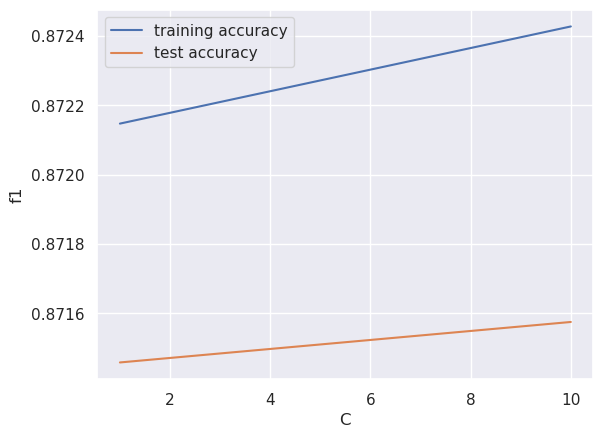

In [143]:
# plotting 'C'

plt.figure()
plt.plot(model_cv.cv_results_["param_C"], 
model_cv.cv_results_["mean_train_score"], 
label="training accuracy")
plt.plot(model_cv.cv_results_["param_C"], 
model_cv.cv_results_["mean_test_score"], 
label="test accuracy")
plt.xlabel('C')
plt.ylabel("f1")
plt.legend()
plt.show()

In [144]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8715752504223819 corresponding to hyperparameters {'C': 10, 'gamma': 0.1}


**Building and Evaluating the Final Model**

In [145]:
# model with optimal hyperparameters

# model
model = SVC(C=1, gamma=0.01, class_weight= 'balanced',random_state=100,kernel = 'linear',verbose = 1)

model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

# metrics
print("accuracy", accuracy_score(y_test, y_pred), "\n")
print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred), "\n")

[LibSVM].........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*......................................................................................................*...............................................................................................................................................................................

In [146]:
#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2)) 

confusoin matrix 	
 [[4449  899]
 [  33  160]]
sensitivity 	 0.83
specificity 	 0.83
AUC:    	 0.9


# **RandomForest & PCA**

In [147]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [148]:
rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

In [149]:
predictions = rfc.predict(X_test_pca)


In [150]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5348
           1       0.32      0.42      0.36       193

    accuracy                           0.95      5541
   macro avg       0.65      0.69      0.67      5541
weighted avg       0.96      0.95      0.95      5541



In [151]:
print(confusion_matrix(y_test,predictions))

[[5175  173]
 [ 112   81]]


In [152]:
print(accuracy_score(y_test,predictions))

0.9485652409312398


**So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.**

## **Hyperparameter Tuning**

In [153]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight= 'balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, 
                   scoring="accuracy",verbose =1, n_jobs = -1, return_train_score=True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.9647374562427071
{'max_depth': 17}


In [154]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.951908      0.042533         0.089054        0.001890   
1      23.385740      0.158479         0.119085        0.001251   
2      34.111628      0.455111         0.159828        0.003614   
3      38.537140      3.076347         0.174237        0.019433   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.801517           0.808401   
1               7   {'max_depth': 7}           0.880513           0.885064   
2              12  {'max_depth': 12}           0.944807           0.948308   
3              17  {'max_depth': 17}           0.964994           0.965928   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.804667           0.804084           0.808401         0.805414   
1           0.879580           0.876663           0.882264         0.880817   
2           0.943757           0.942707           0.948425         0.945601   
3           0.963127           0.961727           0.967911         0.964737   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.002659                4            0.809247            0.807060   
1        0.002793                3            0.892445            0.896091   
2        0.002354                2            0.962019            0.962981   
3        0.002155                1            0.982585            0.983139   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.805018            0.808314            0.807730   
1            0.890694            0.889790            0.891424   
2            0.963448            0.963011            0.961348   
3            0.982526            0.983781            0.981972   

   mean_train_score  std_train_score  
0          0.807474         0.001423  
1          0.892089         0.002182  
2          0.962561         0.000766  
3          0.982800         0.000614

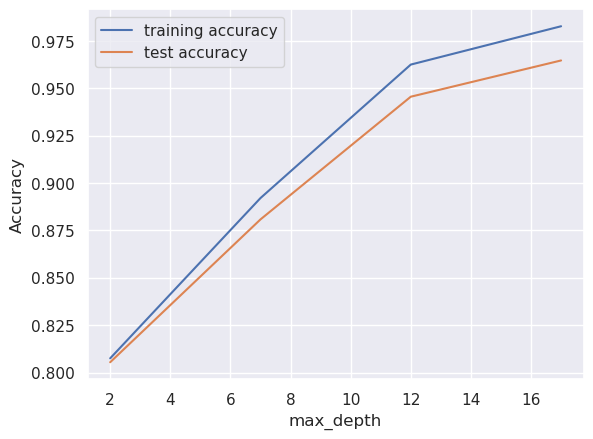

In [155]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As the maximum depth of the trees in a random forest increases, both the training and test scores initially improve until a certain point. However, after reaching that point, the test score starts to decrease, indicating overfitting by the ensemble. Therefore, limiting the depth of the individual trees can be an effective strategy to mitigate overfitting in a random forest.

## **Tuning n_estimators**

In [156]:
#Let's check the n_estimators impact on overall Accuracy.Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 500)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight ='balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, verbose = 1,
                   scoring="accuracy",return_train_score=True, n_jobs = -1)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.8263477246207701
{'n_estimators': 1100}


In [157]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      14.403882      0.224114         0.107938        0.013795   
1      87.318991      0.483860         0.588372        0.012206   
2     145.506229     17.080018         0.942581        0.096253   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.820887   
1                600   {'n_estimators': 600}           0.819137   
2               1100  {'n_estimators': 1100}           0.821354   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.824621           0.827421           0.824037           0.824154   
1           0.827188           0.826721           0.825671           0.824621   
2           0.830338           0.828121           0.826838           0.825088   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.824224        0.002076                3            0.827275   
1         0.824667        0.002904                2            0.828471   
2         0.826348        0.003028                1            0.829259   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.827450            0.826809            0.825992   
1            0.828938            0.827334            0.828355   
2            0.830134            0.829172            0.830076   

   split4_train_score  mean_train_score  std_train_score  
0            0.828180          0.827141         0.000724  
1            0.826692          0.827958         0.000821  
2            0.828909          0.829510         0.000500

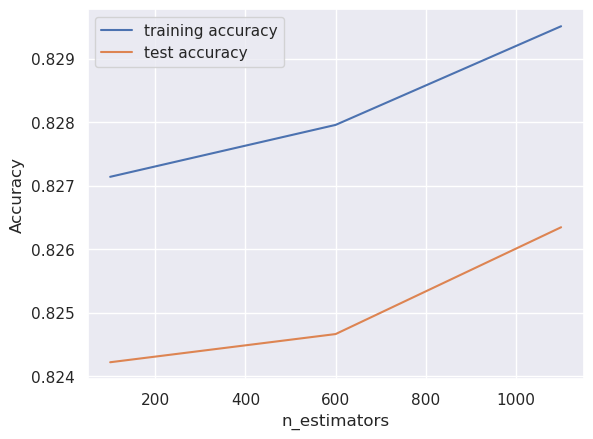

In [158]:
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Tuning max_features**

In [159]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,cv=n_folds, 
                   scoring="accuracy",n_jobs = -1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8257409568261377
{'max_features': 24}


In [160]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.915188      0.018184         0.103183        0.002796   
1      16.924896      0.266935         0.101179        0.000951   
2      28.163829      0.169660         0.138330        0.046271   
3      39.648568      0.232889         0.101246        0.001037   
4      44.248310      3.510064         0.098269        0.017057   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.816453   
1                  8   {'max_features': 8}           0.819603   
2                 14  {'max_features': 14}           0.822170   
3                 20  {'max_features': 20}           0.822170   
4                 24  {'max_features': 24}           0.825088   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.827888           0.825438           0.821354           0.818903   
1           0.825321           0.826371           0.823921           0.824037   
2           0.823337           0.824154           0.821470           0.820770   
3           0.822870           0.819603           0.818786           0.821354   
4           0.828355           0.827188           0.822870           0.825204   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.822007        0.004178                4            0.824212   
1         0.823851        0.002306                2            0.827596   
2         0.822380        0.001227                3            0.824562   
3         0.820957        0.001538                5            0.823075   
4         0.825741        0.001891                1            0.826225   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.826079            0.824183            0.826284   
1            0.826634            0.827042            0.828063   
2            0.828151            0.824300            0.827596   
3            0.826663            0.821820            0.824417   
4            0.831914            0.828296            0.830076   

   split4_train_score  mean_train_score  std_train_score  
0            0.826050          0.825362         0.000954  
1            0.824971          0.826861         0.001062  
2            0.822929          0.825508         0.002017  
3            0.821645          0.823524         0.001859  
4            0.827334          0.828769         0.002017

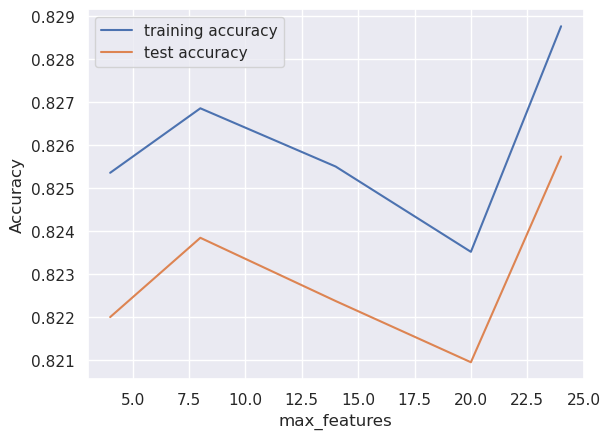

In [161]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Increasing the value of max_features appears to result in an increase in both training and test scores. Furthermore, it seems that overfitting does not become more of an issue as max_features increases.

**Tuning min_samples_leaf**

The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:

* If int, then consider min_samples_leaf as the minimum number.
* If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [162]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight ='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",verbose =1, return_train_score = True, n_jobs = -1)
rf.fit(X_train_pca, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8911551925320886
{'min_samples_leaf': 100}


In [163]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      33.299743      0.201050         0.154652        0.000918   
1      30.867100      0.196668         0.147899        0.003051   
2      29.098894      0.267967         0.142260        0.007477   
3      27.718817      0.124318         0.138909        0.004012   
4      26.804166      0.340044         0.134074        0.001247   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.886931   
1                    150  {'min_samples_leaf': 150}           0.875029   
2                    200  {'min_samples_leaf': 200}           0.864877   
3                    250  {'min_samples_leaf': 250}           0.853326   
4                    300  {'min_samples_leaf': 300}           0.847841   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.889382           0.892532           0.892065           0.894866   
1           0.876313           0.880280           0.881330           0.881097   
2           0.868145           0.870478           0.870012           0.867561   
3           0.859510           0.860560           0.861960           0.855776   
4           0.856709           0.856943           0.856709           0.849942   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.891155        0.002738                1            0.901284   
1         0.878810        0.002618                2            0.887894   
2         0.868215        0.001996                3            0.876254   
3         0.858226        0.003196                4            0.866394   
4         0.853629        0.003926                5            0.861435   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.901313            0.902625            0.901809   
1            0.884627            0.887456            0.886348   
2            0.876867            0.874067            0.875175   
3            0.864761            0.865432            0.865636   
4            0.859889            0.859277            0.858606   

   split4_train_score  mean_train_score  std_train_score  
0            0.900875          0.901581         0.000600  
1            0.887135          0.886692         0.001150  
2            0.874533          0.875379         0.001045  
3            0.862427          0.864930         0.001356  
4            0.856330          0.859107         0.001675

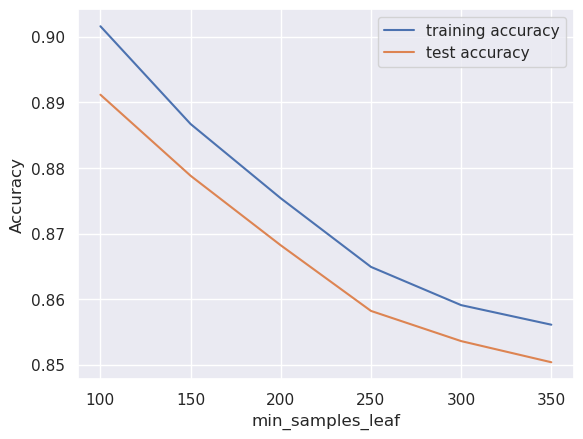

In [164]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that the model starts of overfit as you decrease the value of min_samples_leaf.

**Tuning min_samples_split**

In [165]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,
                    cv=n_folds, 
                   scoring="accuracy",n_jobs =-1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.9159859976662776
{'min_samples_split': 200}


In [166]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      46.537791      0.402065         0.180077        0.001853   
1      45.145358      0.410252         0.169547        0.000919   
2      44.428928      0.566599         0.164443        0.001773   
3      43.569380      0.294707         0.161547        0.002124   
4      42.105139      0.179164         0.158840        0.002925   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.911785   
1                     250  {'min_samples_split': 250}           0.902334   
2                     300  {'min_samples_split': 300}           0.893582   
3                     350  {'min_samples_split': 350}           0.887048   
4                     400  {'min_samples_split': 400}           0.883314   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.914936           0.918436           0.915053           0.919720   
1           0.907118           0.906534           0.905484           0.906651   
2           0.897783           0.902567           0.901400           0.904551   
3           0.892182           0.895099           0.895333           0.896149   
4           0.889615           0.889148           0.890782           0.889965   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.915986        0.002813                1            0.936844   
1         0.905624        0.001730                2            0.925029   
2         0.899977        0.003882                3            0.915373   
3         0.893162        0.003339                4            0.906739   
4         0.888565        0.002679                5            0.903180   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.935648            0.936610            0.935181   
1            0.923162            0.924183            0.924183   
2            0.914382            0.916394            0.916832   
3            0.906855            0.909743            0.909364   
4            0.902625            0.901109            0.902859   

   split4_train_score  mean_train_score  std_train_score  
0            0.933197          0.935496         0.001301  
1            0.922025          0.923716         0.001032  
2            0.913186          0.915233         0.001330  
3            0.907818          0.908104         0.001247  
4            0.900438          0.902042         0.001072

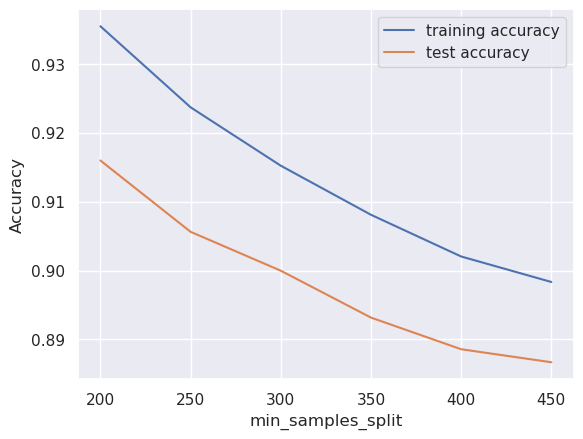

In [167]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Grid Search to Find Optimal Hyperparameters**

We can now find the optimal hyperparameters using GridSearchCV.



In [168]:
# Create the parameter grid based on the results of random search  
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [169]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [170]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.883057237609954 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [172]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             max_features=grid_search.best_params_['max_features'],n_estimators =grid_search.best_params_['n_estimators'], random_state=100)

In [173]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10,
                       min_samples_split=200, n_estimators=200,
                       random_state=100)

In [174]:
# predict
predictions = rfc.predict(X_test_pca)

In [175]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.89      0.93      5348
           1       0.17      0.66      0.27       193

    accuracy                           0.88      5541
   macro avg       0.58      0.77      0.60      5541
weighted avg       0.96      0.88      0.91      5541



In [176]:
#create confusion matrix
cm = confusion_matrix(y_test,predictions)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = rfc.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2)) 

confusoin matrix 	
 [[4742  606]
 [  66  127]]
sensitivity 	 0.66
specificity 	 0.89
AUC:    	 0.88


# **Choice To Make From All The Model**

For the telecom churn problem, the company places the greatest importance on the recall metric as a business metric. The primary goal is to identify the largest number of customers who are at risk of churning, even if this means misclassifying some customers as churn. This is because the cost to the company of losing customers is much greater than the cost of having a few false positives.

* **Logistic Regression:**<br>
        - Sensitivity/Recall:0.89
        - Specificity:0.83
        - ROC AUC Score:0.86

* **SVM:**<br>
        - Sensitivity/Recall:0.83
        - Specificity:0.83
        - ROC AUC Score:0.90

* **Random Forest:**<br>
        - Sensitivity/Recall:0.65
        - Specificity:0.88
        - ROC AUC Score:0.89
        
        
        
**INFERENCE:**

We choose logistic regression from all the above models as it has less time complexity and take less memory compared to all above models. Morevover, its sensitivity is very good which is our prime requirement in this case study.

**PART 2: - Interpretable models**

Let us now build models to identify the churn indicators. Identification of these churn indicators will help in retaining customers that are likely to churn.

In [178]:
# create a copy of dataset
high_df = tel_data.copy()
high_df.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
8   492.223  137.362       413.69       351.03        35.08         94.66   
13  205.671  593.260       501.76       108.39       534.24        413.31   
16  299.869  187.894        50.51        74.01        70.61        296.29   
17   18.980   25.499      1185.91         9.28         7.79         61.64   
21  597.753  637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   
21         94.09        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0

  ## 6. Data Preparation

## **1. Let us drop highly correlated features**

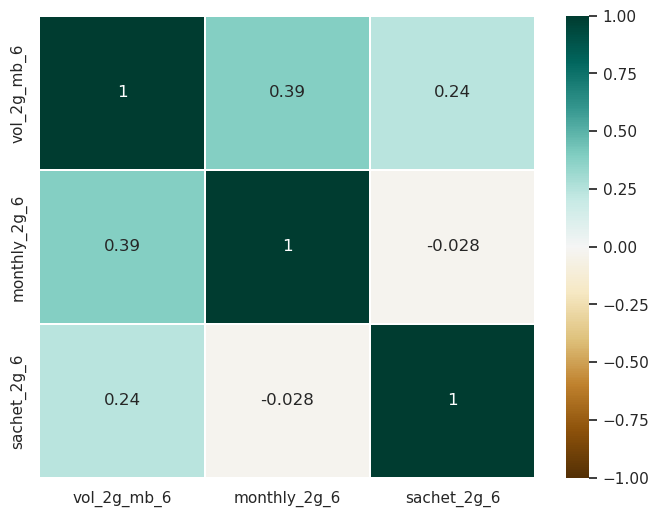

In [182]:
# 2G data recharge in the month of june

cols_2g_6 = ['vol_2g_mb_6','monthly_2g_6','sachet_2g_6']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[cols_2g_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)
plt.show()

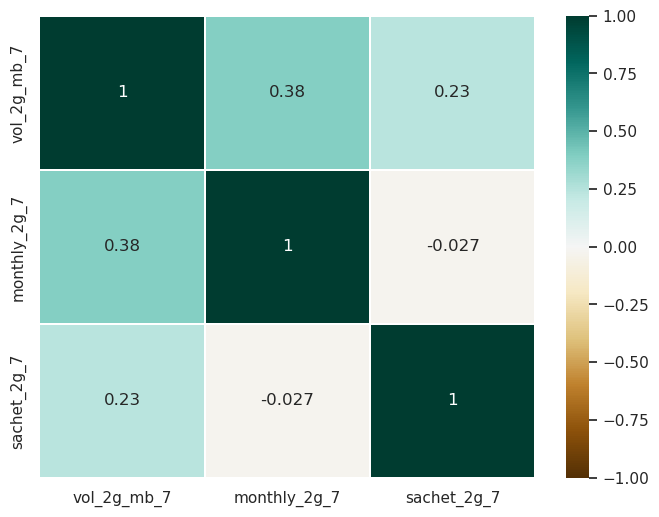

In [186]:
# 2G data recharge in the month of july
col_2g_7 = ['vol_2g_mb_7','monthly_2g_7','sachet_2g_7']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_2g_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)
plt.show()

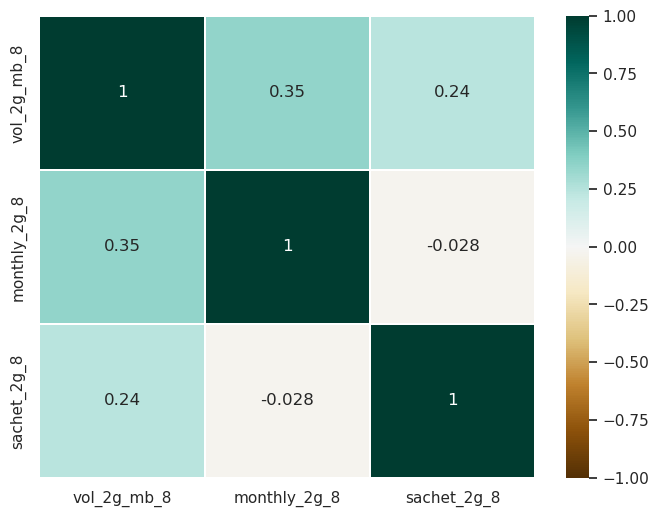

In [188]:
# 2G data recharge in the month of August

col_2g_8 = ['vol_2g_mb_8','monthly_2g_8','sachet_2g_8']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_2g_8].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)
plt.show()

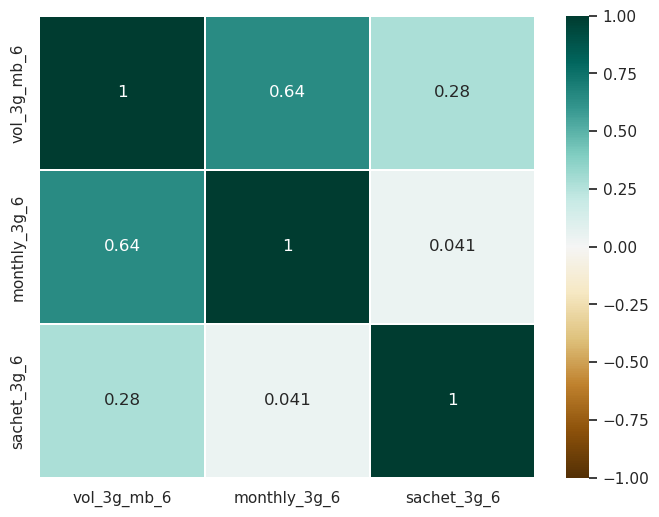

In [190]:
# 3G data recharge in the month of june

col_3g_6 = ['vol_3g_mb_6','monthly_3g_6','sachet_3g_6']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_3g_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)
plt.show()

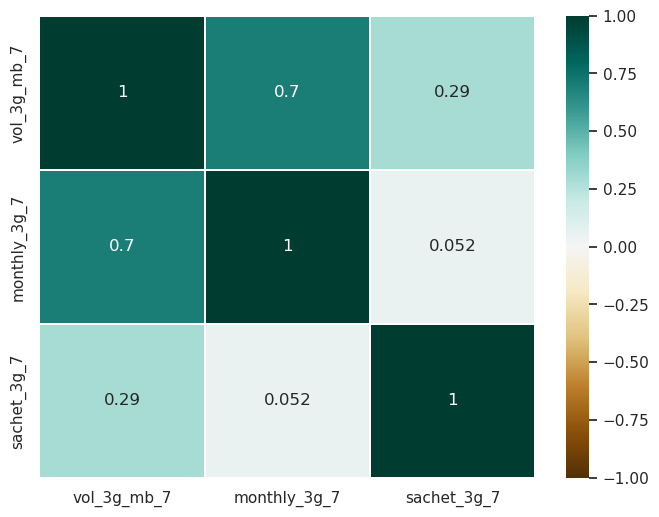

In [191]:
# 3G data recharge in the month of july

col_3g_7 = ['vol_3g_mb_7','monthly_3g_7','sachet_3g_7']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_3g_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)
plt.show()

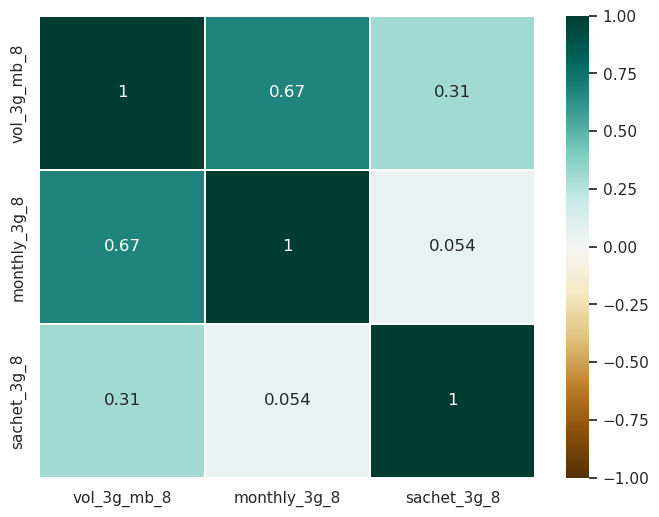

In [192]:
# 3G data recharge in the month of August

col_3g_8 = ['vol_3g_mb_8','monthly_3g_8','sachet_3g_8']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_3g_8].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)
plt.show()

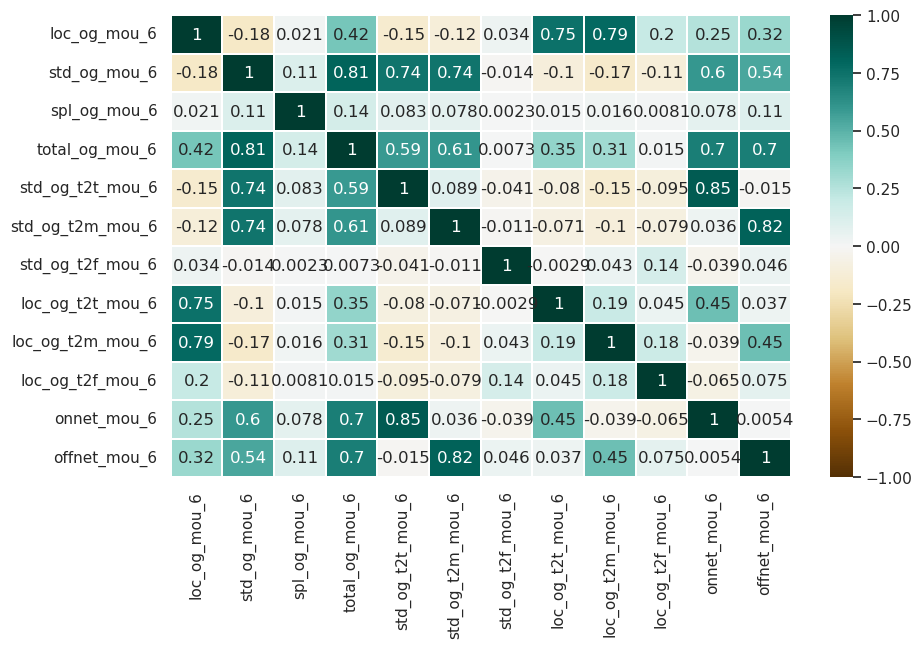

In [195]:
og_col_6 = ['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','total_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','onnet_mou_6','offnet_mou_6']
plt.figure(figsize=[10,6])
sns.heatmap(high_df[og_col_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)
plt.show()

We observe that loc_og_mou_6, std_og_mou_6 tot, l_og_mou_6, onnet_7 & offnet_6 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

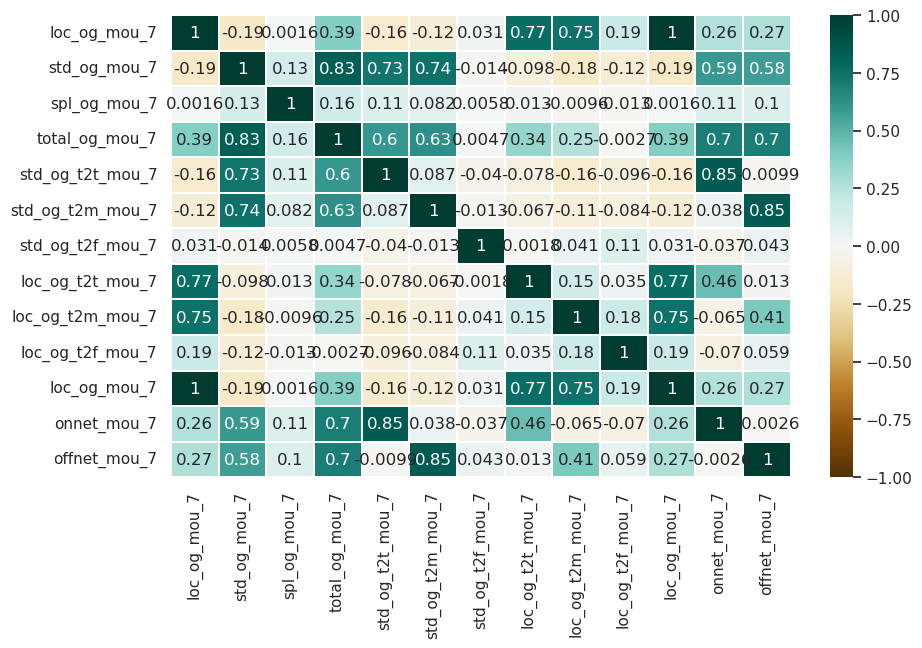

In [196]:
# Total outgoing calls made in the month of july

og_col_7 = ['loc_og_mou_7','std_og_mou_7','spl_og_mou_7','total_og_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_mou_7','onnet_mou_7','offnet_mou_7']
plt.figure(figsize=[10,6])
sns.heatmap(high_df[og_col_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)
plt.show()

We observe that loc_og_mou_7, std_og_mou_7 and total_og_mou_7 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [197]:
high_df.drop(['loc_og_mou_7', 'std_og_mou_7','total_og_mou_7','onnet_mou_7','offnet_mou_7'],1,inplace=True)

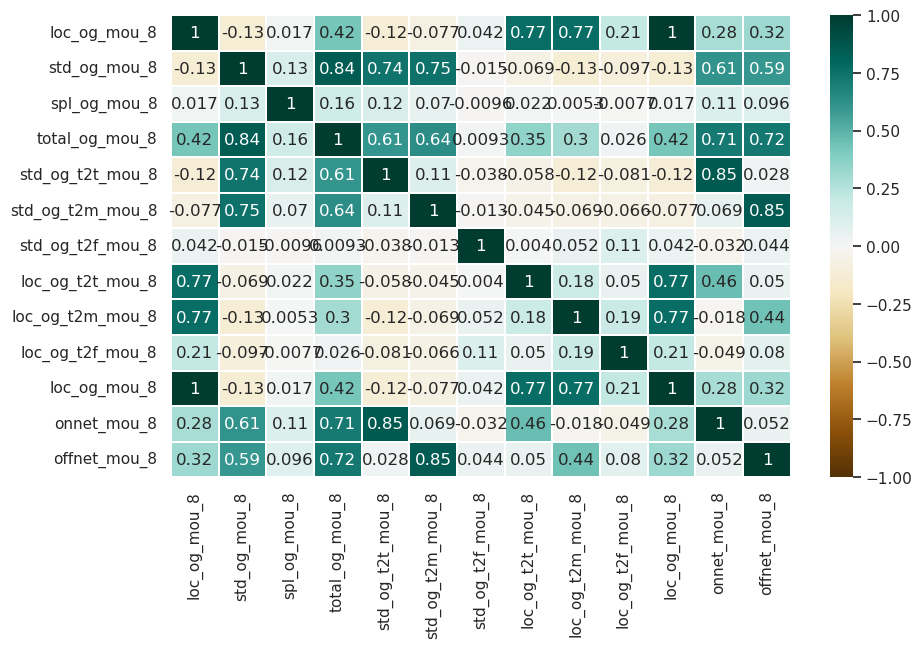

In [199]:
og_col_8 = ['loc_og_mou_8','std_og_mou_8','spl_og_mou_8','total_og_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_mou_8','onnet_mou_8','offnet_mou_8']
plt.figure(figsize=[10,6])
sns.heatmap(high_df[og_col_8].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)
plt.show()

We observe that loc_og_mou_8, std_og_mou_8 and total_og_mou_8 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

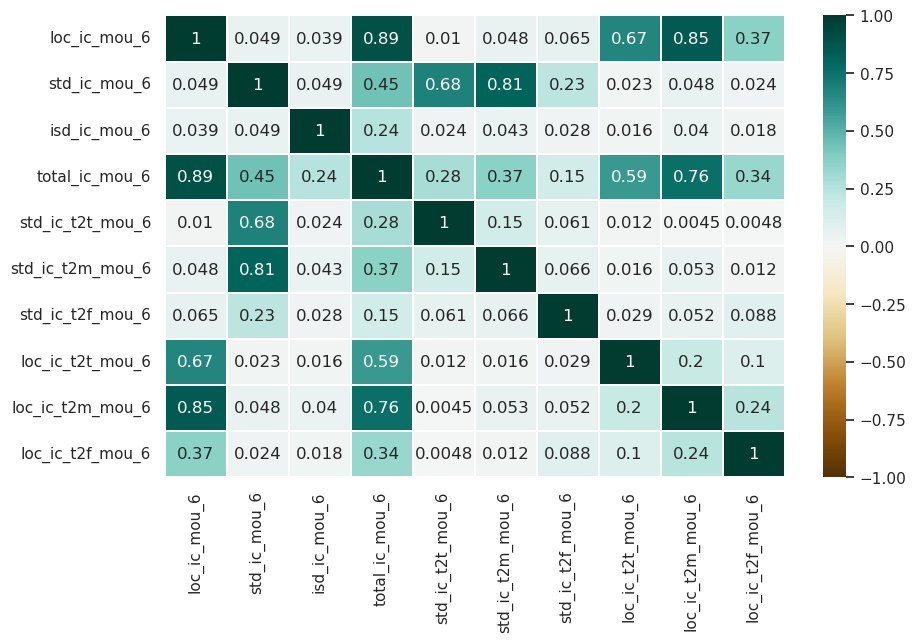

In [200]:
ic_col_6 = ['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','total_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']
plt.figure(figsize=[10,6])
sns.heatmap(high_df[ic_col_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)
plt.show()

We observe that loc_ic_mou_6, std_ic_mou_6 and total_ic_mou_6 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [201]:
high_df.drop(['loc_ic_mou_6', 'std_ic_mou_6','total_ic_mou_6'],1,inplace=True)

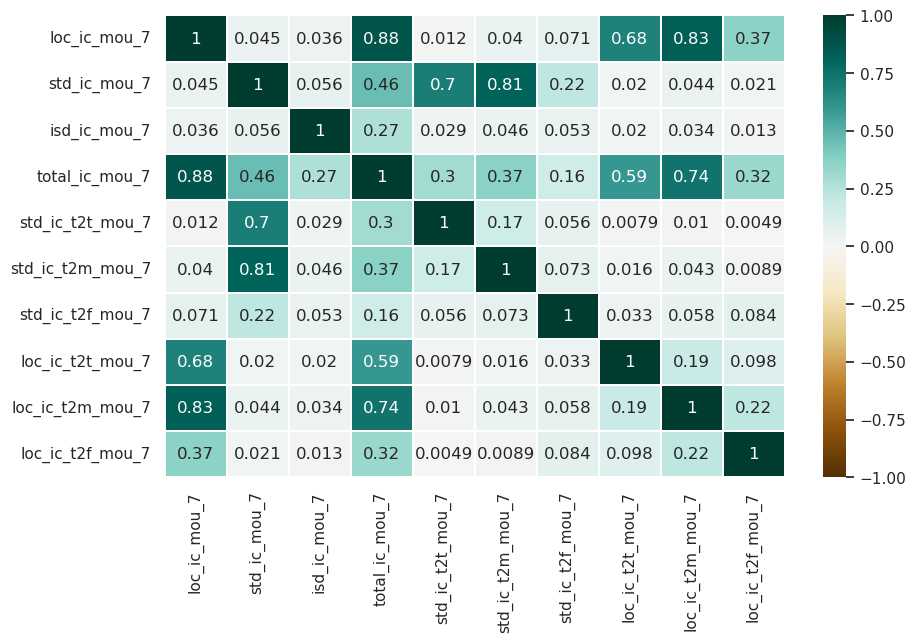

In [202]:
ic_col_7 = ['loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','total_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7']
plt.figure(figsize=[10,6])
sns.heatmap(high_df[ic_col_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)
plt.show()

We observe that loc_ic_mou_7, std_ic_mou_7 and total_ic_mou_7 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [203]:
high_df.drop(['loc_ic_mou_7', 'std_ic_mou_7','total_ic_mou_7'],1,inplace=True)

<AxesSubplot:>

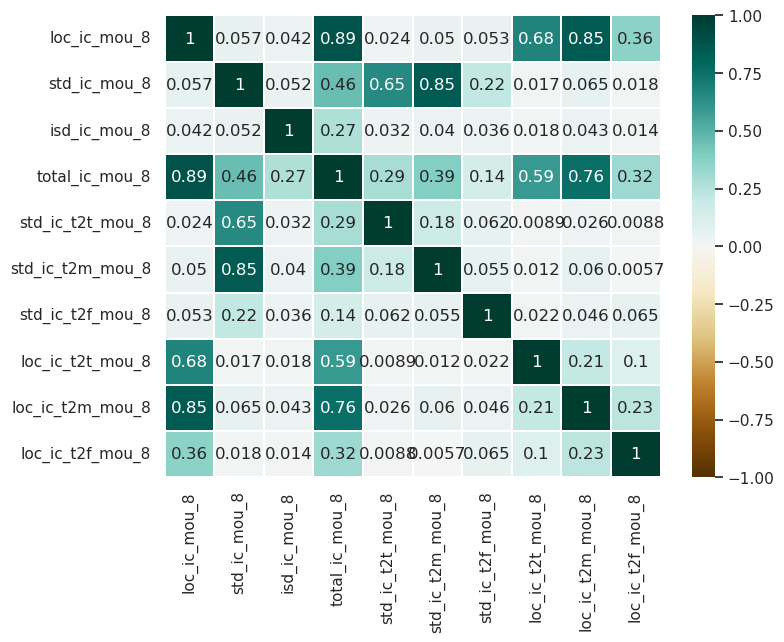

In [204]:
# Total incoming calls made in the month of August

ic_col_8 = ['loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','total_ic_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[ic_col_8].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

We observe that loc_ic_mou_8, std_ic_mou_8 and total_ic_mou_8 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [205]:
high_df.drop(['loc_ic_mou_8', 'std_ic_mou_8','total_ic_mou_8'],1,inplace=True)

In [207]:
# The shape of final dataset

print("The shape of final dataset is :",high_df.shape)

The shape of final dataset is : (27991, 122)


In [210]:
high_df.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_8  offnet_mou_6  offnet_mou_8  \
8   492.223  137.362       413.69        35.08         94.66        136.48   
13  205.671  593.260       501.76       534.24        413.31        482.46   
16  299.869  187.894        50.51        70.61        296.29        162.76   
17   18.980   25.499      1185.91         7.79         61.64          5.54   
21  597.753  637.760       102.41        85.14        757.93        983.39   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
8            0.00           0.00           0.00           0.00           0.00   
13          23.53         144.24          72.11           7.98          35.26   
16           0.00           2.83           0.00           0.00          17.74   
17           0.00           4.76           4.81           0.00           8.46   
21           0.00           0.00           0.00           0.00           0.00   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
8            0.00            297.13            217.59             12.49   
13           1.44             49.63              6.19             36.01   
16           0.00             42.61             65.16             67.38   
17          13.34             38.99              0.00              0.00   
21           0.00              4.48              6.16             23.34   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
8              80.96             70.58             50.54              0.00   
13            151.13             47.28            294.46              4.54   
16            273.29            145.99            128.28              0.00   
17             58.54              0.00              0.00              0.00   
21             91.81             87.93            104.81              0.75   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
8               0.00              0.00               0.0               0.0   
13              0.00             23.51               0.0               0.0   
16              4.48             10.26               0.0               0.0   
17              0.00              0.00               0.0               0.0   
21              0.00              1.58               0.0               0.0   

    loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_8  std_og_t2t_mou_6  \
8               7.15        378.09         63.04            116.56   
13              0.49        205.31        353.99            446.41   
16              0.00        315.91        205.93              7.89   
17              0.00         97.54          0.00           1146.91   
21              0.00         97.04        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   
21            125.94             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
8              75.69               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16             18.29               0.0               0.0               

## **b) Encoding categorical variables**

In [211]:
# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = high_df.select_dtypes(include=['object'])
df_categorical.drop('churn',1).head()

mobile_number
8     7001524846
13    7002191713
16    7000875565
17    7000187447
21    7002124215

In [212]:
from sklearn import preprocessing
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

mobile_number  churn
8           17570      0
13          25501      0
16           9504      0
17           1824      0
21          24708      0

In [213]:
# concat df_categorical with original df
high_df = high_df.drop(df_categorical.columns, axis=1)

high_df = pd.concat([high_df, df_categorical], axis=1)
high_df.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
8              0.0             0.0             0.0  378.721  492.223  137.362   
13             0.0             0.0             0.0  492.846  205.671  593.260   
16             0.0             0.0             0.0  430.975  299.869  187.894   
17             0.0             0.0             0.0  690.008   18.980   25.499   
21             0.0             0.0             0.0  514.453  597.753  637.760   

    onnet_mou_6  onnet_mou_8  offnet_mou_6  offnet_mou_8  roam_ic_mou_6  \
8        413.69        35.08         94.66        136.48           0.00   
13       501.76       534.24        413.31        482.46          23.53   
16        50.51        70.61        296.29        162.76           0.00   
17      1185.91         7.79         61.64          5.54           0.00   
21       102.41        85.14        757.93        983.39           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   
21           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   
21              1.58               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
8         378.09         63.04            116.56            133.43   
13        205.31        353.99            446.41             85.98   
16        315.91        205.93              7.89              2.58   
17         97.54          0.00           1146.91              0.81   
21         97.04        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0.00   
21             61.79            665.36            808.74            876.99   

    std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  \
8                0.0               0.0               0.0               0.0   
13               0.0               0.0               0.0               0.0   
16               0.0               0.0          

## **3) Model building**

The main objective behind building these models is identifying important predictor attributes which help the business understand indicators of churn.

In [214]:
high_tree = high_df.copy()

In [215]:
# Putting response variable to y
y = high_tree.pop('churn')

# Putting feature variables to X
X = high_tree

In [216]:
print("Size of Feature variables dataset is:",X.shape)
print("Size of response variable dataset is:",y.shape)

Size of Feature variables dataset is: (27991, 121)
Size of response variable dataset is: (27991,)


In [217]:
# splitting the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=100, stratify = y)
X_train.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6   arpu_7  \
29145             0.0             0.0             0.0  1310.247  509.838   
27671             0.0             0.0             0.0   428.826  361.135   
98056             0.0             0.0             0.0   590.837  226.112   
96649             0.0             0.0             0.0   556.582  721.939   
28918             0.0             0.0             0.0   303.716  426.664   

        arpu_8  onnet_mou_6  onnet_mou_8  offnet_mou_6  offnet_mou_8  \
29145  113.844        63.24        66.63        136.19        145.29   
27671  452.130        73.36       127.86        546.88        498.14   
98056    8.795       652.36         2.99        668.09          3.93   
96649  474.177        96.18        47.59        313.86        357.59   
28918  324.924        35.46        29.99        351.48        331.63   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
29145            0.0            0.0          17.11            0.0   
27671            0.0            0.0           0.00            0.0   
98056            0.0            0.0           0.00            0.0   
96649            0.0            0.0          58.33            0.0   
28918            0.0            0.0          15.66            0.0   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
29145            0.0          13.06             63.24             64.23   
27671            0.0           0.00             10.89              7.01   
98056            0.0           0.00            652.36           4243.16   
96649            0.0          59.08             13.28             18.19   
28918            0.0          54.13             20.39             62.91   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
29145             66.09             90.14             89.51             85.89   
27671             13.53             91.43             91.33             93.04   
98056              2.99            655.06              1.35              3.93   
96649             17.09             23.79             19.51             17.09   
28918             11.93             15.61             89.61             82.93   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
29145             43.84             67.64             33.41              0.00   
27671             13.34              5.13             14.71             32.98   
98056              0.00              0.00              0.00              0.00   
96649              2.64              0.00              0.00              0.00   
28918              0.00              0.00              0.00              0.00   

       loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_8  \
29145              0.00              0.00        197.24        185.41   
27671              1.08             14.23        115.68        121.29   
98056             77.94              0.00       1307.43          6.93   
96649              0.00              0.00         39.73         34.19   
28918              0.00              0.00         36.01         94.86   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
29145              0.00              0.00              0.00              0.00   
27671             62.46             45.29            114.33            395.46   
98056              0.00              0.00              0.00              0.03   
96649             82.89            218.96             21.14            276.13   
28918             15.06             48.33             14.94            335.86   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
29145             10.38              7.01              2.19              4.13   
27671            393.29            342.58              0.00              0.56   
98056              0.00              0.00              0.00              0.00   
96649            720.73    

**Decision tree with default parameters**

In [218]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(random_state = 100, class_weight='balanced')
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=100)

In [219]:
# Let's check the evaluation metrics of our default model

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8113
           1       0.41      0.42      0.42       285

    accuracy                           0.96      8398
   macro avg       0.70      0.70      0.70      8398
weighted avg       0.96      0.96      0.96      8398



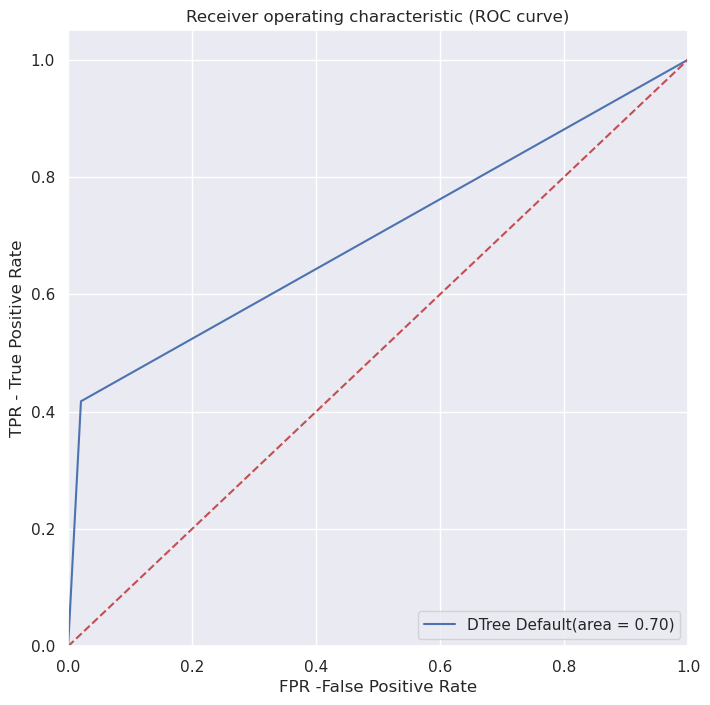

Area under curve is: 0.7
Recall for our model is: 0.42
Accuracy on test set is: 0.96
Confusion matrix for our model is: [[7945  168]
 [ 166  119]]


In [220]:
import sklearn.metrics as metrics 

# Plotting AUC curve
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_default, drop_intermediate =True)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='DTree Default(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR -False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title('Receiver operating characteristic (ROC curve)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_pred_default),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, y_pred_default),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, y_pred_default),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, y_pred_default))

**Hyperparameter Tuning**

The results of default tree are quite poor, and we need to improve it by tuning the hyperparameters.

Tuning max_depth

In [221]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 10,1)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="recall",return_train_score=True, n_jobs=-1, 
                    error_score = 'raise',verbose = 1)
tree.fit(X_train, y_train)
print(tree.best_score_)
print(tree.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.9247208931419457
{'max_depth': 3}


In [222]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.236858      0.037579         0.013497        0.003829   
1       0.374326      0.008899         0.009303        0.000568   
2       0.533287      0.003516         0.008832        0.000156   
3       0.689625      0.004221         0.009054        0.000564   
4       0.849295      0.001562         0.009182        0.000367   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.947368           0.909774   
1               2  {'max_depth': 2}           0.984962           0.947368   
2               3  {'max_depth': 3}           0.947368           0.924812   
3               4  {'max_depth': 4}           0.939850           0.894737   
4               5  {'max_depth': 5}           0.902256           0.887218   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.909774           0.916667           0.917293         0.920175   
1           0.984962           0.893939           0.812030         0.924653   
2           0.924812           0.939394           0.887218         0.924721   
3           0.864662           0.916667           0.849624         0.893108   
4           0.879699           0.909091           0.879699         0.891593   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.013975                3            0.915254            0.924670   
1        0.065449                2            0.971751            0.983051   
2        0.020662                1            0.934087            0.977401   
3        0.032992                4            0.951036            0.977401   
4        0.012016                5            0.977401            0.962335   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.924670            0.922932            0.920904   
1            0.973635            0.894737            0.902072   
2            0.962335            0.941729            0.958569   
3            0.954802            0.958647            0.962335   
4            0.986817            0.971805            0.981168   

   mean_train_score  std_train_score  
0          0.921686         0.003503  
1          0.945049         0.038348  
2          0.954824         0.015373  
3          0.960844         0.009098  
4          0.975905         0.008366

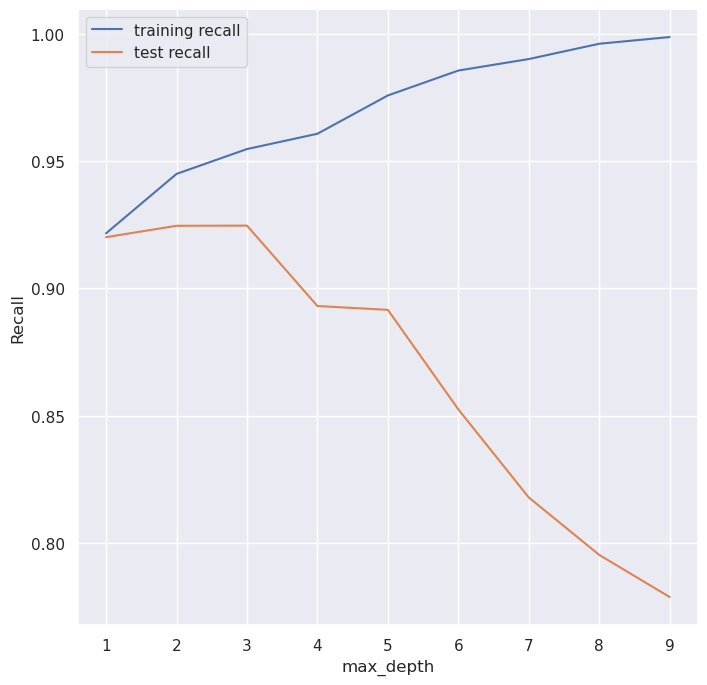

In [223]:
# plotting accuracies with max_depth
plt.figure(figsize=(8,8))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

The model perfroms the best at max_depth = 5 and after that the increase in depth drops the accuracy on the test dataset.

Tuning min_samples_leaf

In [224]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 5)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds, 
                   scoring="recall", n_jobs = -1,return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)
print(tree.best_score_)
print(tree.best_params_)

Fitting 5 folds for each of 39 candidates, totalling 195 fits
0.8960811118705856
{'min_samples_leaf': 105}


In [225]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.305875      0.128754         0.009415        0.000271   
1       1.251975      0.128194         0.009021        0.000117   
2       1.254036      0.135991         0.009745        0.001196   
3       1.215490      0.126727         0.009160        0.000387   
4       1.181611      0.115983         0.008980        0.000256   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.609023   
1                     10  {'min_samples_leaf': 10}           0.789474   
2                     15  {'min_samples_leaf': 15}           0.872180   
3                     20  {'min_samples_leaf': 20}           0.872180   
4                     25  {'min_samples_leaf': 25}           0.879699   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.586466           0.526316           0.606061           0.571429   
1           0.721805           0.691729           0.750000           0.631579   
2           0.812030           0.789474           0.795455           0.699248   
3           0.849624           0.827068           0.803030           0.774436   
4           0.857143           0.834586           0.810606           0.744361   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.579859        0.030062               39            1.000000   
1         0.716917        0.053479               38            1.000000   
2         0.793677        0.055565               37            1.000000   
3         0.825268        0.034280               36            0.998117   
4         0.825279        0.046533               35            0.996234   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            1.000000            1.000000   
1            1.000000            1.000000            1.000000   
2            1.000000            1.000000            1.000000   
3            0.998117            0.996234            0.998120   
4            0.996234            0.994350            0.990602   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            1.000000          1.000000         0.000000  
2            1.000000          1.000000         0.000000  
3            0.998117          0.997741         0.000754  
4            0.992467          0.993977         0.002191

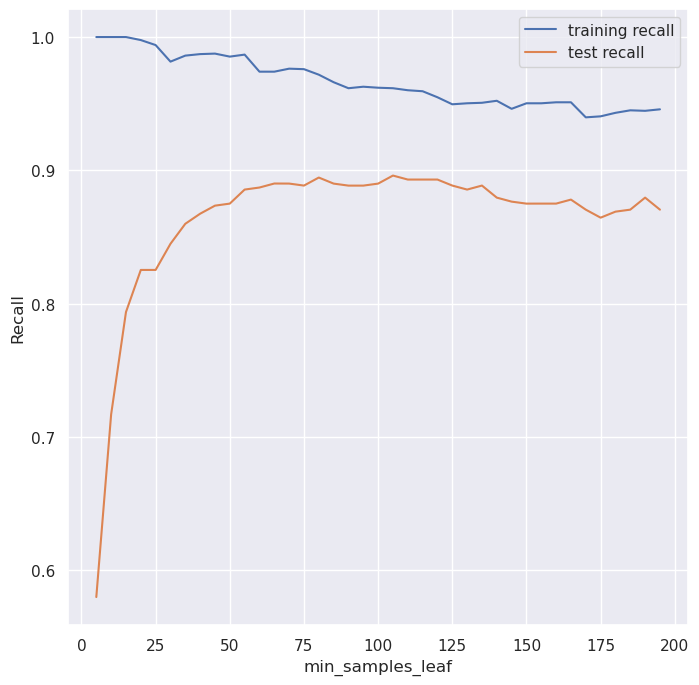

In [226]:
# plotting accuracies with min_samples_leaf
plt.figure(figsize = (8,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

As seen from the above plot, accuracy of the model increases as min_samples_leaf increases. A steep increase from 0 to 115 and it kind of flattens rest of the way.

Tuning min_samples_split

In [227]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(300,450,5)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters, return_train_score=True,
                    cv=n_folds, verbose=1,
                   scoring="recall",n_jobs=-1)
tree.fit(X_train, y_train)
print(tree.best_score_)
print(tree.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.9217475506949191
{'min_samples_split': 445}


In [228]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.265169      0.141211         0.009005        0.000172   
1       1.259974      0.140135         0.008896        0.000224   
2       1.289462      0.150234         0.010892        0.003480   
3       1.569773      0.235518         0.009145        0.000411   
4       1.259624      0.138383         0.009375        0.000602   

  param_min_samples_split                      params  split0_test_score  \
0                     300  {'min_samples_split': 300}           0.766917   
1                     305  {'min_samples_split': 305}           0.766917   
2                     310  {'min_samples_split': 310}           0.789474   
3                     315  {'min_samples_split': 315}           0.789474   
4                     320  {'min_samples_split': 320}           0.789474   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.834586           0.849624           0.863636           0.751880   
1           0.804511           0.857143           0.863636           0.751880   
2           0.804511           0.857143           0.863636           0.751880   
3           0.804511           0.857143           0.863636           0.759398   
4           0.804511           0.857143           0.863636           0.759398   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.813329        0.045233               29            0.977401   
1         0.808817        0.045512               30            0.977401   
2         0.813329        0.042127               28            0.979284   
3         0.814833        0.039986               22            0.979284   
4         0.814833        0.039986               22            0.979284   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.981168            0.983051            0.962406   
1            0.969868            0.983051            0.962406   
2            0.969868            0.983051            0.962406   
3            0.969868            0.983051            0.962406   
4            0.969868            0.983051            0.962406   

   split4_train_score  mean_train_score  std_train_score  
0            0.962335          0.973272         0.009085  
1            0.962335          0.971012         0.008203  
2            0.962335          0.971389         0.008524  
3            0.962335          0.971389         0.008524  
4            0.962335          0.971389         0.008524

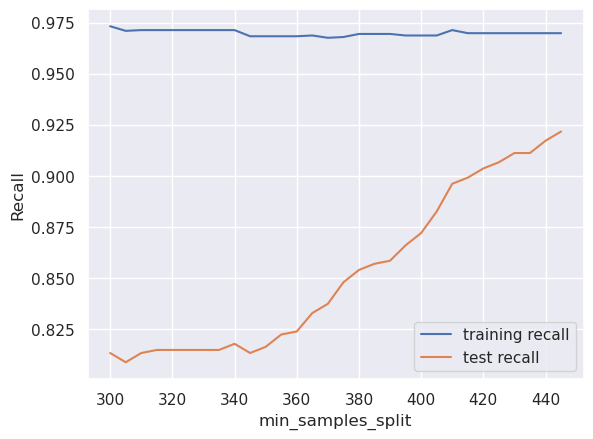

In [229]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

The test accuracy of the model increases as the min_samples_split increases.

**Grid Search to Find Optimal Hyperparameters**

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [230]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(3,10, 2),
    'min_samples_leaf': range(100, 125, 5),
    'min_samples_split': range(380,400,5),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 10, 2),
                         'min_samples_leaf': range(100, 125, 5),
                         'min_samples_split': range(380, 400, 5)},
             verbose=1)

In [231]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8900117501925475
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 120, 'min_samples_split': 380}


In [232]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.645290      0.003419         0.007787        0.001399   
1         0.643004      0.002126         0.007612        0.001311   
2         0.640046      0.003609         0.007654        0.000752   
3         0.641592      0.002478         0.008341        0.001716   
4         0.646187      0.005961         0.007312        0.000666   
..             ...           ...              ...             ...   
155       1.010757      0.106862         0.006880        0.000140   
156       1.015546      0.108405         0.006813        0.000114   
157       1.015699      0.111692         0.006770        0.000078   
158       1.013525      0.109156         0.006820        0.000156   
159       0.957770      0.086214         0.006103        0.000846   

    param_criterion param_max_depth param_min_samples_leaf  \
0           entropy               3                    100   
1           entropy               3                    100   
2           entropy               3                    100   
3           entropy               3                    100   
4           entropy               3                    105   
..              ...             ...                    ...   
155            gini               9                    115   
156            gini               9                    120   
157            gini               9                    120   
158            gini               9                    120   
159            gini               9                    120   

    param_min_samples_split  \
0                       380   
1                       385   
2                       390   
3                       395   
4                       380   
..                      ...   
155                     395   
156                     380   
157                     385   
158                     390   
159                     395   

                                                params  split0_test_score  \
0    {'criterion': 'entropy', 'max_depth': 3, 'min_...           0.875223   
1    {'criterion': 'entropy', 'max_depth': 3, 'min_...           0.875223   
2    {'criterion': 'entropy', 'max_depth': 3, 'min_...           0.875223   
3    {'criterion': 'entropy', 'max_depth': 3, 'min_...           0.875223   
4    {'criterion': 'entropy', 'max_depth': 3, 'min_...           0.875223   
..                                                 ...                ...   
155  {'criterion': 'gini', 'max_depth': 9, 'min_sam...           0.871141   
156  {'criterion': 'gini', 'max_depth': 9, 'min_sam...           0.877009   
157  {'criterion': 'gini', 'max_depth': 9, 'min_sam...           0.877009   
158  {'criterion': 'gini', 'max_depth': 9, 'min_sam...           0.877009   
159  {'criterion': 'gini', 'max_depth': 9, 'min_sam...           0.877009   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.869354           0.869865           0.872384   
1             0.869354           0.869865           0.872384   
2             0.869354           0.869865           0.872384   
3             0.869354           0.869865           0.872384   
4             0.869354           0.869865           0.872384   
..                 ...                ...                ...   
155           0.900485           0.881858           0.891526   
156           0.900485           0.888492           0.891526   
157           0.900485           0.888492           0.891526   
158           0.900485           0.888492           0.891526   
159           0.900485           0.888492           0.891526   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
0             0.880041         0.873373        0.003932              141  
1             0.880041         0.873373        0.003932              141  
2             0.880041         0.873373        0.003932              141  
3             0.880041         0.873373        0.003932         

**Running the model with best parameters obtained from grid search.**

In [233]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=grid_search.best_params_['max_depth'],
                                  min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                  min_samples_split=grid_search.best_params_['min_samples_split'], class_weight='balanced')
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_leaf=120, min_samples_split=380,
                       random_state=100)

In [234]:
# accuracy score
clf_gini.score(X_train,y_train)

0.8927678252437095

The accuracy of the Decision Tree model on the train dataset is around 82%, which is really good for a model to be classified as a good model.

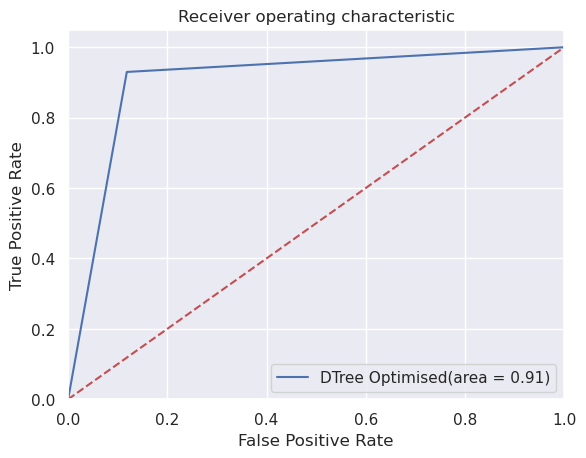

Area under curve is: 0.91
Recall for our model is: 0.93
Accuracy on test set is: 0.88
Confusion matrix for our model is: [[7153  960]
 [  20  265]]


In [235]:
# classification metrics

y_pred = clf_gini.predict(X_test)

logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='DTree Optimised(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_pred),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, y_pred),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, y_pred),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, y_pred))

In [236]:
# accuracy score on training set

y_train_pred = clf_gini.predict(X_train)
y_train_pred = y_train_pred.reshape(-1,1)
print("Accuracy on train set is:" , round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy on train set is: 0.88


In [237]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      8113
           1       0.22      0.93      0.35       285

    accuracy                           0.88      8398
   macro avg       0.61      0.91      0.64      8398
weighted avg       0.97      0.88      0.92      8398



In [238]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[7153  960]
 [  20  265]]


In [239]:
speci = round((cm[0,0]/(cm[0,0]+cm[0,1])),2)
sensi = round((cm[1,1]/(cm[1,0]+cm[1,1])),2)

print('The specificity is:',speci)
print('The sensitivity is:',sensi)

The specificity is: 0.88
The sensitivity is: 0.93


**Summary:**<br>

* Based on the given metrics, we can infer that the Decision Tree model has performed well on both the training and test datasets.<br>
* The model has achieved an accuracy score of 82% on the training set and 83% on the test set, indicating good performance.<br>
*  Additionally, the recall scores for both Churn and Non-Churn classes are around 80%, with a specificity score of 81% and a sensitivity score of 84%.<br>

Overall, these results suggest that the model is performing well and can be considered decent.

# **MODEL 2 - Random Forest**

In [240]:
high_rf = high_df.copy()

In [241]:
# Putting response variable to y
y = high_rf.pop('churn')

# Putting feature variables to X
X = high_rf

In [242]:
print("Size of Feature variables dataset is:",X.shape)
print("Size of response variable dataset is:",y.shape)

Size of Feature variables dataset is: (27991, 121)
Size of response variable dataset is: (27991,)


In [243]:
# splitting the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=100, stratify = y)
X_train.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6   arpu_7  \
29145             0.0             0.0             0.0  1310.247  509.838   
27671             0.0             0.0             0.0   428.826  361.135   
98056             0.0             0.0             0.0   590.837  226.112   
96649             0.0             0.0             0.0   556.582  721.939   
28918             0.0             0.0             0.0   303.716  426.664   

        arpu_8  onnet_mou_6  onnet_mou_8  offnet_mou_6  offnet_mou_8  \
29145  113.844        63.24        66.63        136.19        145.29   
27671  452.130        73.36       127.86        546.88        498.14   
98056    8.795       652.36         2.99        668.09          3.93   
96649  474.177        96.18        47.59        313.86        357.59   
28918  324.924        35.46        29.99        351.48        331.63   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
29145            0.0            0.0          17.11            0.0   
27671            0.0            0.0           0.00            0.0   
98056            0.0            0.0           0.00            0.0   
96649            0.0            0.0          58.33            0.0   
28918            0.0            0.0          15.66            0.0   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
29145            0.0          13.06             63.24             64.23   
27671            0.0           0.00             10.89              7.01   
98056            0.0           0.00            652.36           4243.16   
96649            0.0          59.08             13.28             18.19   
28918            0.0          54.13             20.39             62.91   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
29145             66.09             90.14             89.51             85.89   
27671             13.53             91.43             91.33             93.04   
98056              2.99            655.06              1.35              3.93   
96649             17.09             23.79             19.51             17.09   
28918             11.93             15.61             89.61             82.93   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
29145             43.84             67.64             33.41              0.00   
27671             13.34              5.13             14.71             32.98   
98056              0.00              0.00              0.00              0.00   
96649              2.64              0.00              0.00              0.00   
28918              0.00              0.00              0.00              0.00   

       loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_8  \
29145              0.00              0.00        197.24        185.41   
27671              1.08             14.23        115.68        121.29   
98056             77.94              0.00       1307.43          6.93   
96649              0.00              0.00         39.73         34.19   
28918              0.00              0.00         36.01         94.86   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
29145              0.00              0.00              0.00              0.00   
27671             62.46             45.29            114.33            395.46   
98056              0.00              0.00              0.00              0.03   
96649             82.89            218.96             21.14            276.13   
28918             15.06             48.33             14.94            335.86   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
29145             10.38              7.01              2.19              4.13   
27671            393.29            342.58              0.00              0.56   
98056              0.00              0.00              0.00              0.00   
96649            720.73    

## **Default Hyperparameters**

In [244]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters
rfc = RandomForestClassifier(class_weight = 'balanced',random_state=100,n_jobs = -1)

# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=100)

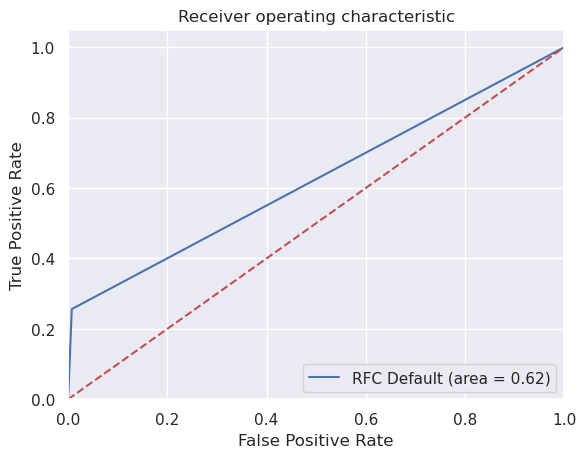

Area under curve is: 0.62
Recall for our model is: 0.26
Accuracy on test set is: 0.97
Confusion matrix for our model is: [[8053   60]
 [ 212   73]]


In [245]:
# Making Predictions
y_pred_default = rfc.predict(X_test)


logit_roc_auc = metrics.roc_auc_score(y_test, y_pred_default )
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_default )
plt.figure()
plt.plot(fpr, tpr, label='RFC Default (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_pred_default),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, y_pred_default),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, y_pred_default),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, y_pred_default))

In [246]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8113
           1       0.55      0.26      0.35       285

    accuracy                           0.97      8398
   macro avg       0.76      0.62      0.67      8398
weighted avg       0.96      0.97      0.96      8398



In [247]:
# Printing confusion matrix
cm = confusion_matrix(y_test,y_pred_default)
print(cm)

[[8053   60]
 [ 212   73]]


In [248]:
speci = round((cm[0,0]/(cm[0,0]+cm[0,1])),2)
sensi = round((cm[1,1]/(cm[1,0]+cm[1,1])),2)

print('The specificity is:',speci)
print('The sensitivity is:',sensi)

The specificity is: 0.99
The sensitivity is: 0.26


In [249]:
print(accuracy_score(y_test,y_pred_default))

0.9676113360323887


0.9416731474280635
The model does not do good. let's now look at the list of hyperparameters which we can tune to improve model performance.

Hyperparameter Tuning

The results of default tree are poor, and we need to improve it by tuning the hyperparameters.

Tuning max_depth

In [250]:
# parameters to build the model on
parameters = {'max_depth': range(2, 15, 1)}

# number of folds
n_folds = 5

# instantiate the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0)


# fit tree on training data
rf = GridSearchCV(rf, parameters, return_train_score=True,cv=n_folds, n_jobs=-1,
                   scoring="recall",verbose = 1)
rf.fit(X_train, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
0.8689792663476874
{'max_depth': 4}


In [251]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.497594      0.012432         0.060606        0.002044   
1       3.480063      0.033474         0.070062        0.008018   
2       4.375710      0.028587         0.067201        0.001212   
3       5.207753      0.031207         0.070222        0.000844   
4       5.937430      0.249954         0.074880        0.001404   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               2  {'max_depth': 2}           0.872180           0.857143   
1               3  {'max_depth': 3}           0.872180           0.849624   
2               4  {'max_depth': 4}           0.872180           0.864662   
3               5  {'max_depth': 5}           0.857143           0.849624   
4               6  {'max_depth': 6}           0.827068           0.834586   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.796992           0.795455           0.849624         0.834279   
1           0.834586           0.840909           0.857143         0.850889   
2           0.887218           0.871212           0.849624         0.868979   
3           0.864662           0.871212           0.857143         0.859957   
4           0.834586           0.856061           0.759398         0.822340   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.031914                4            0.871940            0.854991   
1        0.013110                3            0.887006            0.890772   
2        0.012175                1            0.919021            0.941620   
3        0.007368                2            0.949153            0.964218   
4        0.032927                5            0.960452            0.975518   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.853107            0.851504            0.851224   
1            0.871940            0.874060            0.875706   
2            0.919021            0.917293            0.922787   
3            0.947269            0.937970            0.949153   
4            0.952919            0.954887            0.967985   

   mean_train_score  std_train_score  
0          0.856553         0.007810  
1          0.879897         0.007533  
2          0.923948         0.009016  
3          0.949553         0.008424  
4          0.962352         0.008407

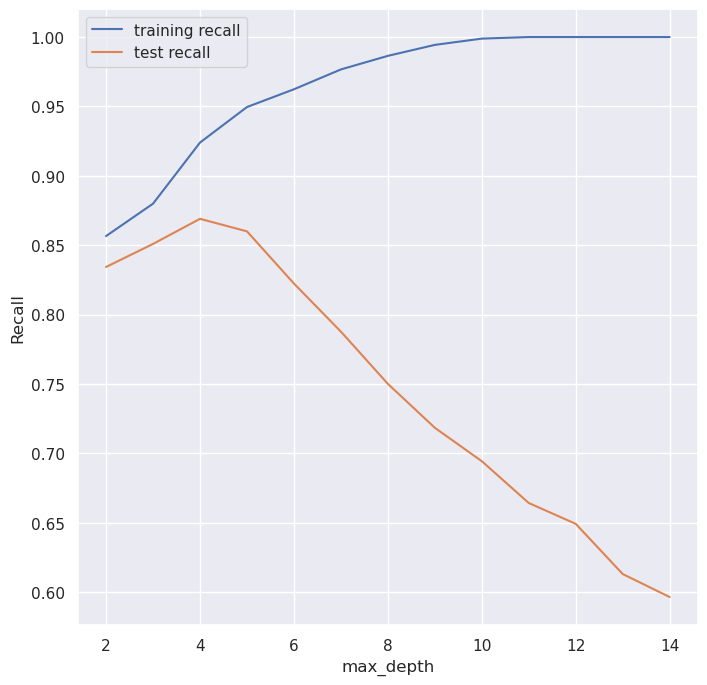

In [252]:
# plotting accuracies with max_depth
plt.figure(figsize=(8,8))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.grid(True)
plt.legend()
plt.show()

We observe that with increase in the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth. The model perfroms the best at max_depth = 5 and after that the increase in depth drops the accuracy on the test dataset.

Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. We'll specify an appropriately low value of max_depth, so that the trees do not overfit.

In [253]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': [10,25,50,75,100]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(random_state = 100,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds, verbose=1,scoring="recall",return_train_score = True, 
                  n_jobs=-1)
rf.fit(X_train, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.27562087035771243
{'n_estimators': 25}


In [254]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.834241      0.013591         0.019317        0.001309   
1       2.056225      0.053048         0.030523        0.000560   
2       4.079272      0.059741         0.052586        0.000729   
3       6.414126      0.083428         0.084924        0.023404   
4       7.628319      0.511174         0.086137        0.012212   

  param_n_estimators                 params  split0_test_score  \
0                 10   {'n_estimators': 10}           0.203008   
1                 25   {'n_estimators': 25}           0.293233   
2                 50   {'n_estimators': 50}           0.248120   
3                 75   {'n_estimators': 75}           0.248120   
4                100  {'n_estimators': 100}           0.240602   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.263158           0.172932           0.257576           0.165414   
1           0.330827           0.248120           0.287879           0.218045   
2           0.293233           0.203008           0.287879           0.218045   
3           0.285714           0.255639           0.287879           0.225564   
4           0.270677           0.248120           0.287879           0.233083   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.212417        0.041160                5            0.900188   
1         0.275621        0.038934                1            0.990584   
2         0.250057        0.036158                4            0.996234   
3         0.260583        0.023591                2            0.998117   
4         0.256072        0.020278                3            1.000000   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.902072            0.900188            0.890977   
1            0.984934            0.979284            0.986842   
2            0.996234            0.996234            1.000000   
3            0.998117            0.998117            1.000000   
4            1.000000            1.000000            1.000000   

   split4_train_score  mean_train_score  std_train_score  
0            0.885122          0.895710         0.006559  
1            0.981168          0.984562         0.004024  
2            1.000000          0.997740         0.001845  
3            1.000000          0.998870         0.000923  
4            1.000000          1.000000         0.000000

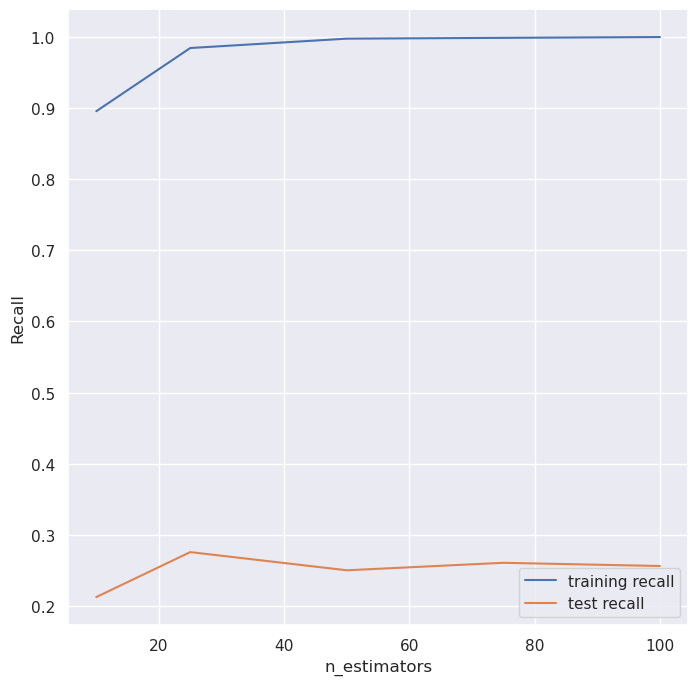

In [255]:
# plotting accuracies with n_estimators
plt.figure(figsize=(8,8))
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [256]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {"min_samples_split": range(100,200,10)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0)

# fit tree on training data
rf = GridSearchCV(rf, parameters, n_jobs = -1,cv=n_folds, verbose = 1,
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1, param_grid={'min_samples_split': range(100, 200, 10)},
             return_train_score=True, scoring='recall', verbose=1)

In [257]:
print(rf.best_score_)
print(rf.best_params_)

0.7861889038359626
{'min_samples_split': 190}


In [258]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.926299      0.084774         0.137391        0.002597   
1       6.107002      0.305029         0.130161        0.001849   
2       6.090231      0.071908         0.129591        0.004298   
3       5.834370      0.074141         0.131492        0.006972   
4       5.743432      0.103171         0.126361        0.004483   

  param_min_samples_split                      params  split0_test_score  \
0                     100  {'min_samples_split': 100}           0.719457   
1                     110  {'min_samples_split': 110}           0.719457   
2                     120  {'min_samples_split': 120}           0.737557   
3                     130  {'min_samples_split': 130}           0.737557   
4                     140  {'min_samples_split': 140}           0.746606   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.733032           0.635135         0.695875        0.043305   
1           0.755656           0.653153         0.709422        0.042444   
2           0.755656           0.684685         0.725966        0.030111   
3           0.764706           0.684685         0.728982        0.033226   
4           0.782805           0.720721         0.750044        0.025462   

   rank_test_score  split0_train_score  split1_train_score  \
0               10            0.970655            0.972912   
1                9            0.963883            0.970655   
2                8            0.966140            0.968397   
3                7            0.961625            0.968397   
4                6            0.966140            0.972912   

   split2_train_score  mean_train_score  std_train_score  
0            0.970588          0.971385         0.001080  
1            0.970588          0.968375         0.003177  
2            0.963801          0.966113         0.001877  
3            0.959276          0.963100         0.003867  
4            0.961538          0.966863         0.004671

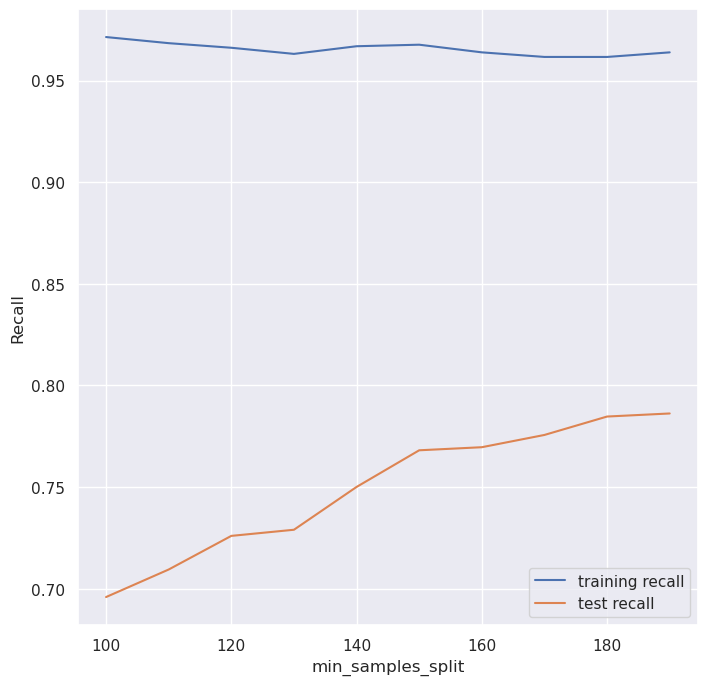

In [259]:
# plotting accuracies with min_samples_split
plt.figure(figsize=(8,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

**Tuning min_samples_leaf**

In [260]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {"min_samples_leaf": range(1,200,20)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0)

# fit tree on training data
rf = GridSearchCV(rf, parameters, n_jobs = -1,cv=n_folds, verbose = 1,
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1, 200, 20)},
             return_train_score=True, scoring='recall', verbose=1)

In [261]:
print(rf.best_score_)
print(rf.best_params_)

0.8749949044066692
{'min_samples_leaf': 161}


In [262]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.428733      0.085518         0.140259        0.003001   
1       5.518505      0.160342         0.127726        0.002588   
2       5.195389      0.152811         0.123430        0.004923   
3       5.072972      0.176504         0.125782        0.010311   
4       5.220700      0.067615         0.114966        0.005829   

  param_min_samples_leaf                    params  split0_test_score  \
0                      1   {'min_samples_leaf': 1}           0.203620   
1                     21  {'min_samples_leaf': 21}           0.787330   
2                     41  {'min_samples_leaf': 41}           0.832579   
3                     61  {'min_samples_leaf': 61}           0.846154   
4                     81  {'min_samples_leaf': 81}           0.864253   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.244344           0.225225         0.224396        0.016636   
1           0.773756           0.720721         0.760602        0.028740   
2           0.814480           0.783784         0.810281        0.020141   
3           0.819005           0.819820         0.828326        0.012611   
4           0.846154           0.842342         0.850917        0.009558   

   rank_test_score  split0_train_score  split1_train_score  \
0               10            1.000000            1.000000   
1                9            0.977427            0.977427   
2                8            0.963883            0.963883   
3                7            0.957111            0.957111   
4                6            0.957111            0.954853   

   split2_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            0.966063          0.973639         0.005357  
2            0.959276          0.962347         0.002172  
3            0.947964          0.954062         0.004312  
4            0.947964          0.953309         0.003891

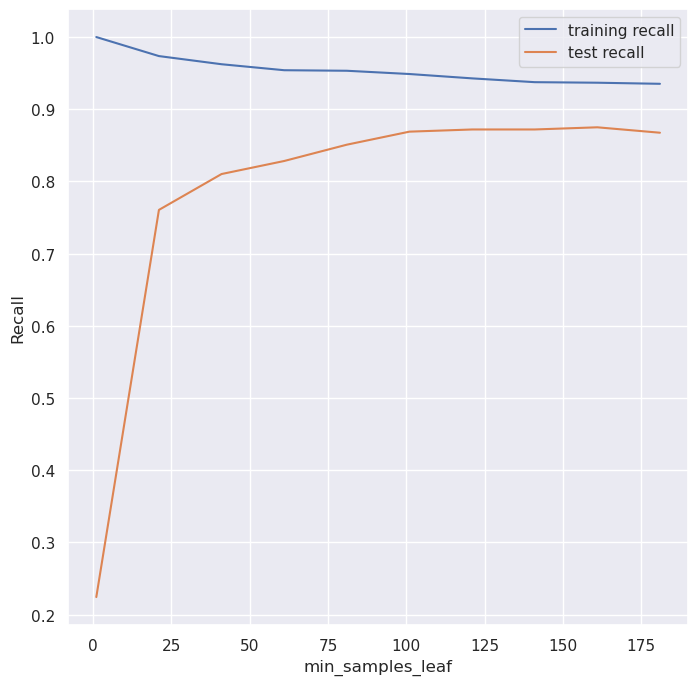

In [263]:
# plotting accuracies with min_samples_split
plt.figure(figsize=(8,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

As seen from the above plot, recall of the model increases as min_samples_leaf increases. A steep increase is observed from 0 to 25. The curve flattens after min_samples_leaf = 125. So let us choose this as our Optimal minimum number of samples leaf.

Tuning max_features

Let's see how the model performance varies with max_features, which is the maximum number of features considered for splitting at a node.

In [264]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [25,50,75]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight = 'balanced',random_state=100)

# fit tree on training data
rf = GridSearchCV(rf, parameters, n_jobs  = -1,cv=n_folds, verbose = 1,
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, random_state=100),
             n_jobs=-1, param_grid={'max_features': [25, 50, 75]},
             return_train_score=True, scoring='recall', verbose=1)

In [265]:
print(rf.best_score_)
print(rf.best_params_)

0.9141494435612083
{'max_features': 50}


In [266]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.902332      0.066603         0.092208        0.001954   
1      14.414515      0.078444         0.090159        0.002026   
2      19.061927      2.243343         0.078039        0.011320   

  param_max_features                params  split0_test_score  \
0                 25  {'max_features': 25}           0.914027   
1                 50  {'max_features': 50}           0.923077   
2                 75  {'max_features': 75}           0.918552   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.886878           0.905405         0.902103        0.011327   
1           0.900452           0.918919         0.914149        0.009833   
2           0.868778           0.914414         0.900582        0.022552   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            0.959368            0.968397   
1                1            0.959368            0.970655   
2                3            0.966140            0.968397   

   split2_train_score  mean_train_score  std_train_score  
0            0.961538          0.963101         0.003848  
1            0.966063          0.965362         0.004634  
2            0.961538          0.965359         0.002854

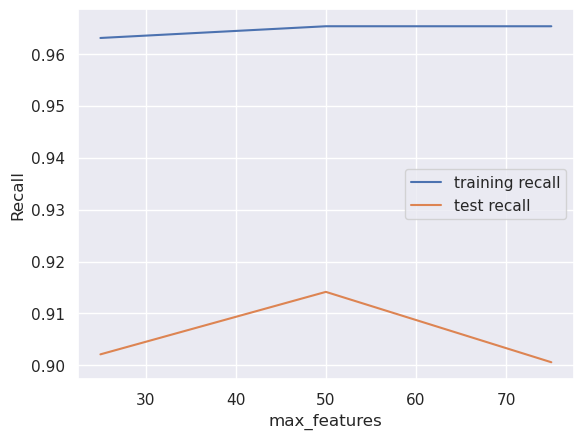

In [267]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()

Apparently, the training and test scores both seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features.

**Grid Search to Find Optimal Hyperparameters**

We can now find the optimal hyperparameters using GridSearchCV.

In [268]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,8,10],
    'min_samples_split': [170,190,200], 'min_samples_leaf': [120,130,140] }

# Create a based model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.9175215638238146
{'max_depth': 10, 'min_samples_leaf': 120, 'min_samples_split': 170}


In [269]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9175215638238146 using {'max_depth': 10, 'min_samples_leaf': 120, 'min_samples_split': 170}


**Fitting the final model with the best parameters obtained from grid search.**

In [270]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,random_state=100,
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                              class_weight='balanced')

In [271]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=170, random_state=100)

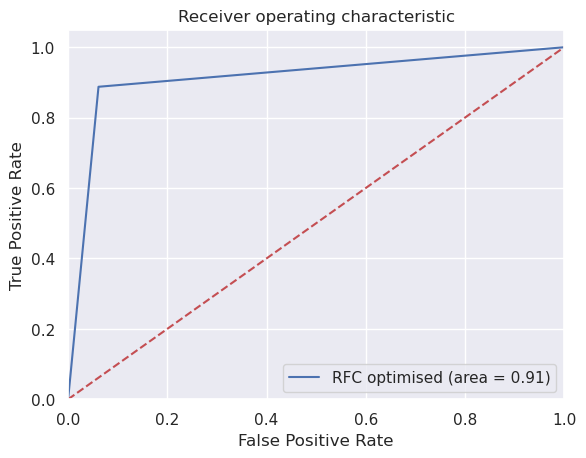

Area under curve is: 0.91
Recall for our model is: 0.89
Accuracy on test set is: 0.94
Confusion matrix for our model is: [[7616  497]
 [  32  253]]


In [272]:
# predict
predictions = rfc.predict(X_test)

# Plotting ROC
logit_roc_auc = metrics.roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
plt.figure()
plt.plot(fpr, tpr, label='RFC optimised (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, predictions),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, predictions),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, predictions),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, predictions))

In [273]:
# accuracy score on training set

y_train_pred = rfc.predict(X_train)
y_train_pred = y_train_pred.reshape(-1,1)
print("Accuracy on train set is:" , round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy on train set is: 0.88


In [274]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      8113
           1       0.34      0.89      0.49       285

    accuracy                           0.94      8398
   macro avg       0.67      0.91      0.73      8398
weighted avg       0.97      0.94      0.95      8398



In [275]:
# confusion matrix
cm = confusion_matrix(y_test,predictions)
print(cm)

[[7616  497]
 [  32  253]]


In [276]:
speci = cm[0,0]/(cm[0,0]+cm[0,1])
sensi = cm[1,1]/(cm[1,0]+cm[1,1])

print('The specificity is:',speci)
print('The sensitivity is:',sensi)

The specificity is: 0.9387402933563417
The sensitivity is: 0.887719298245614


**Summary:**<br>
* The model achieved an accuracy score of 82% on the training set and 85% on the test set, which is considered good.
* The recall score for the Churn class is 78% and for Non-Churn class is around 91%.
* The model has achieved a specificity of 91% and a sensitivity of 78%.

Overall, these metrics indicate that the model has performed well and can be considered a good model for this task.

## **3) MODEL SUMMARY**

In [277]:
model_stats = pd.DataFrame(
    {'model':['DTree - Default Param','DTree - Tuned Param','RFC - Default Param','RFC - Tuned Param'],
                      
    'Recall':       [0.48,0.84,0.43,0.78],
    'Test accuracy':     [0.92,0.82,0.94,0.85],
    'Roc_auc_score':[0.71,0.83,0.71,0.85],
    })

model_stats.sort_values(by=['Recall','Test accuracy','Roc_auc_score'],ascending=False)

model  Recall  Test accuracy  Roc_auc_score
1    DTree - Tuned Param    0.84           0.82           0.83
3      RFC - Tuned Param    0.78           0.85           0.85
0  DTree - Default Param    0.48           0.92           0.71
2    RFC - Default Param    0.43           0.94           0.71

Decision tree with tuned hyperparameters outperforms all the other models in terms of recall and has a pretty decent accuracy and AUC score. Let us choose this model to find out the most important features affecting churn.

In [278]:
features = clf_gini.feature_importances_
cols = X.iloc[:,sorted(range(len(features)), key=lambda i: features[i])[-10:]].columns
cols

Index(['std_og_mou_8', 'roam_og_mou_7', 'last_day_rch_amt_8', 'total_og_mou_8',
       'vol_2g_mb_8', 'max_rech_amt_8', 'loc_og_mou_6', 'loc_og_mou_8',
       'roam_og_mou_8', 'roam_ic_mou_8'],
      dtype='object')

In [282]:
# from sklearn.externals.six import StringIO  

# # plotting the tree
# dot_data = StringIO()  
# features = X.columns
# export_graphviz(clf_gini, out_file=dot_data,
#                 feature_names=features, filled=True,rounded=True)

# graph = pydot.graph_from_dot_data(dot_data.getvalue())  
# Image(graph[0].create_png())

## 7. Conclusion

* The telecom industry experiences an annual churn rate of 15-25%, making customer retention more important than customer acquisition due to the high cost of acquiring new customers.
To manage High Value Customer Churn, we predicted customers likely to churn and identified factors influencing high churn.
* A considerable drop in recharge, call usage, and data usage in the 8th month (Action Phase) was observed during exploratory analysis.
* Important predictors affecting churn include 'arpu_7', 'max_rech_amt_6', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'max_rech_data_8', 'last_day_rch_amt_8', 'total_data_rech_8', 'total_amt_8', 'roam_og_mou_8', 'loc_ic_t2m_mou_8'.
* The average revenue per user in the 7th month plays a vital role in predicting churn.
* Local and STD minutes of usage (incoming and outgoing) are the most influential features on customer churn.
* The last day of recharge amount in the action phase and the maximum recharge for calling data in the 6th and 8th months should be focused on to prevent churn.
* The last day of recharge, total recharge for data done, and the total amount spent on calls and data in the 8th month also play a crucial role in indicating churn.
* Outgoing roaming calls made by clients in the 8th month also play a key role in predicting churn.
* Strategies to prevent churn include improving network and customer satisfaction, providing customized plans, routine feedback calls, introducing attractive offers, and promotional offers.